**Honestly, I don't think clustering stocks using Centroid-like machine learning makes any sense for real trading, machines can't tell and interpret the indicators as men do, besides the data are nothing more than only one snapshot of the companies' numerous historical data.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./stock_data.csv')
df.head(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [3]:
df.loc[df['ROE']==0]

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio


# **1. Data Preparing**

In [4]:
df.shape

(340, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- Good, <font color='blue' >no NULL value</font> founded.

In [6]:
df.duplicated().sum(),df.isnull().sum().sum()

(0, 0)

In [7]:
# fix column names
df.columns = [c.replace(" ", "_") for c in df.columns]

- Also, <font color='blue'>no duplicated value</font>

In [8]:
# General observe the dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


- *’Ticker Symbol‘* is no need for analysis because it is same as *’Security‘*, just a abbrivation.

In [9]:
# Drop Ticker Symbol
df.drop(columns=['Ticker_Symbol'],inplace=True)

# **2. Exploratory Data Analysis (EDA)**

In [10]:
# Build a function to facilate plotting the features

def univ_plot(dataset,x,kde=True):
    fig,axs = plt.subplots(
        nrows=2,
        figsize=(16,9),
        gridspec_kw={'height_ratios': [1, 3]})
    
    sns.histplot(dataset,x=x, kde=True,ax=axs[1])
    axs[1].axvline(x = x.mean(),color='darkred',linestyle='--')
    axs[1].axvline(x = x.median(),color='darkgreen',linestyle='--')
    sns.boxplot(x= x,ax=axs[0],showmeans=True,color='purple')

    plt.show()

In [11]:
numeric_cols = df.select_dtypes(exclude='object').columns

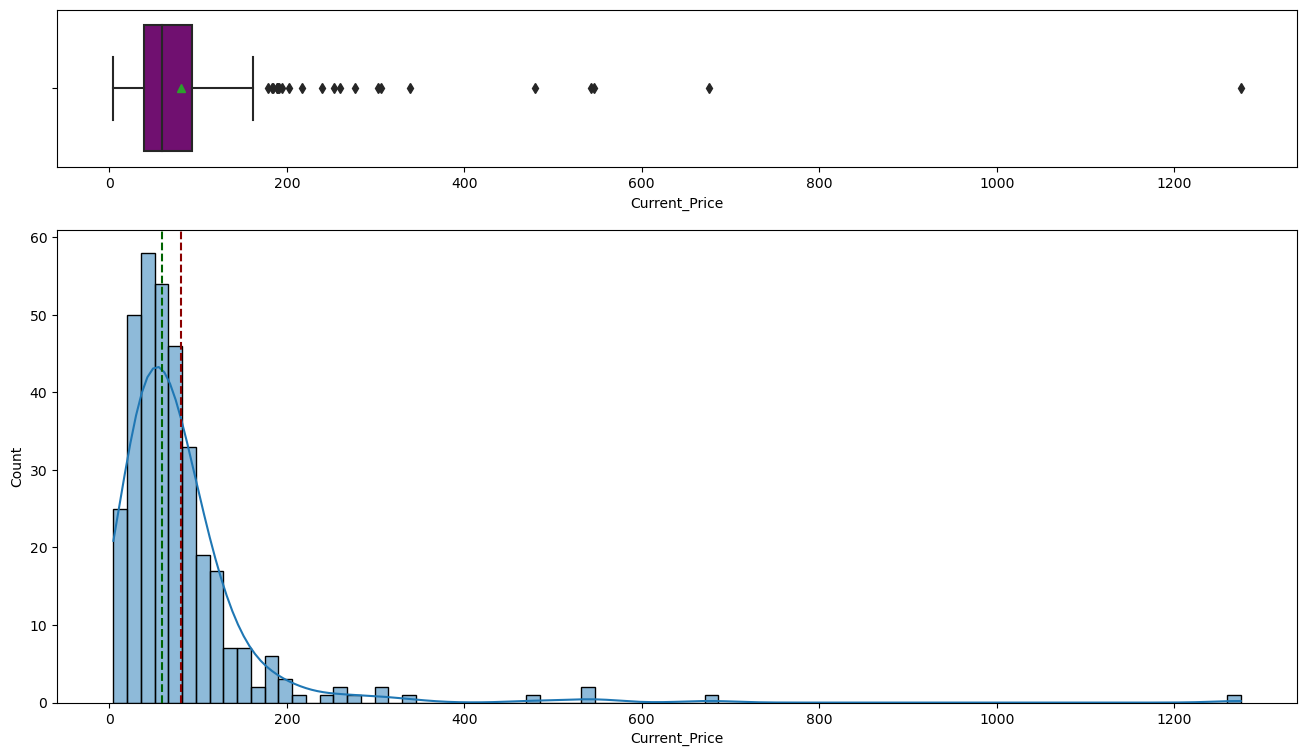

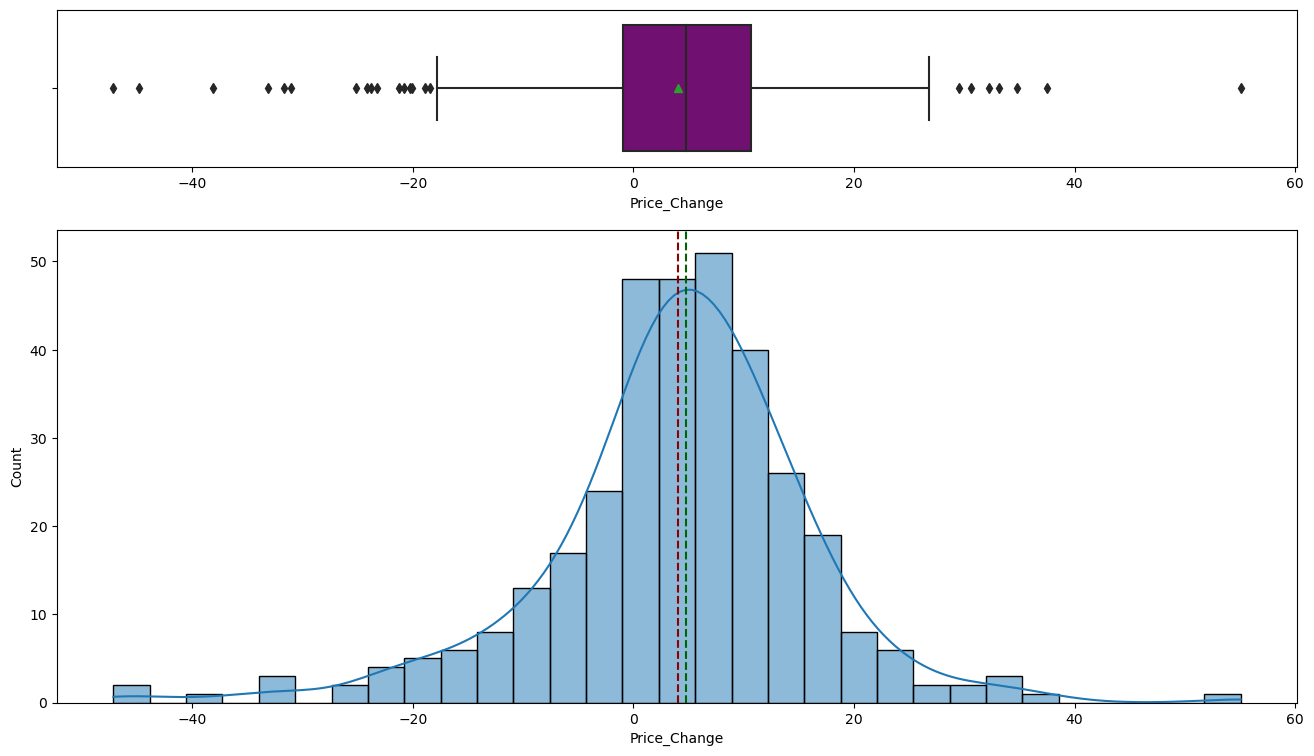

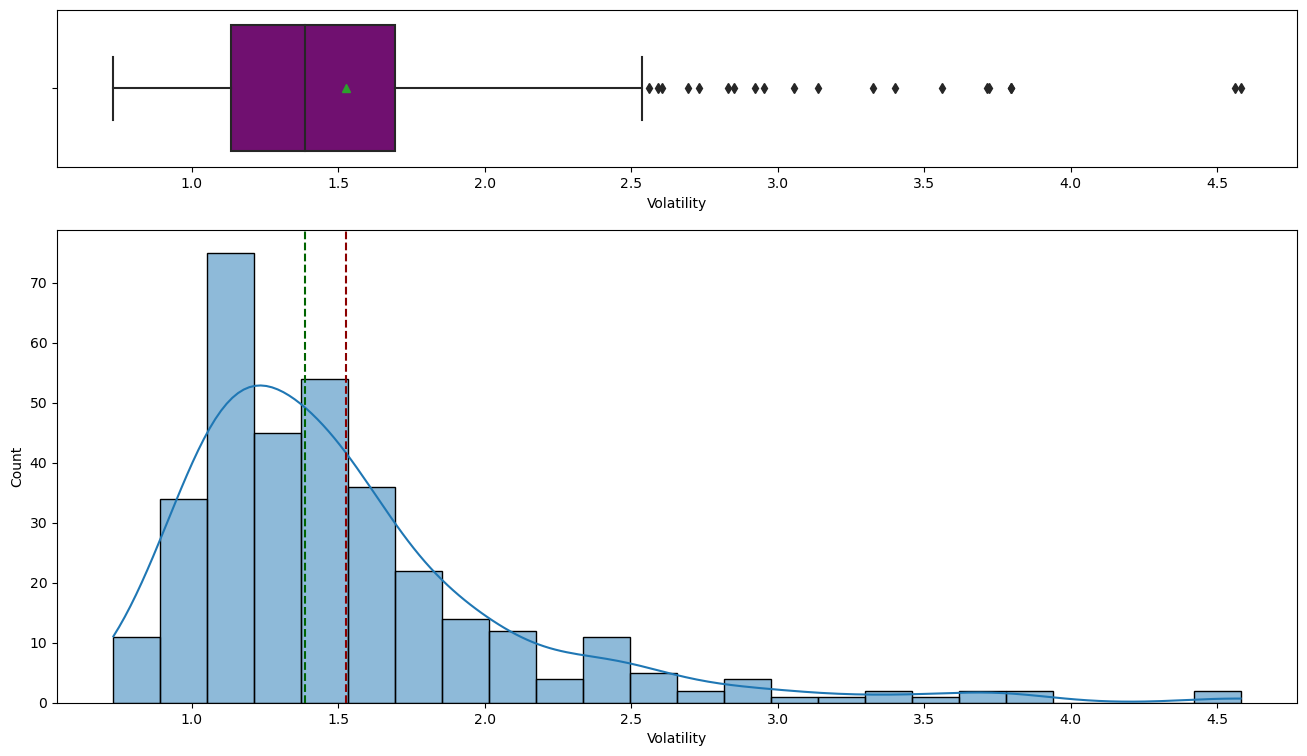

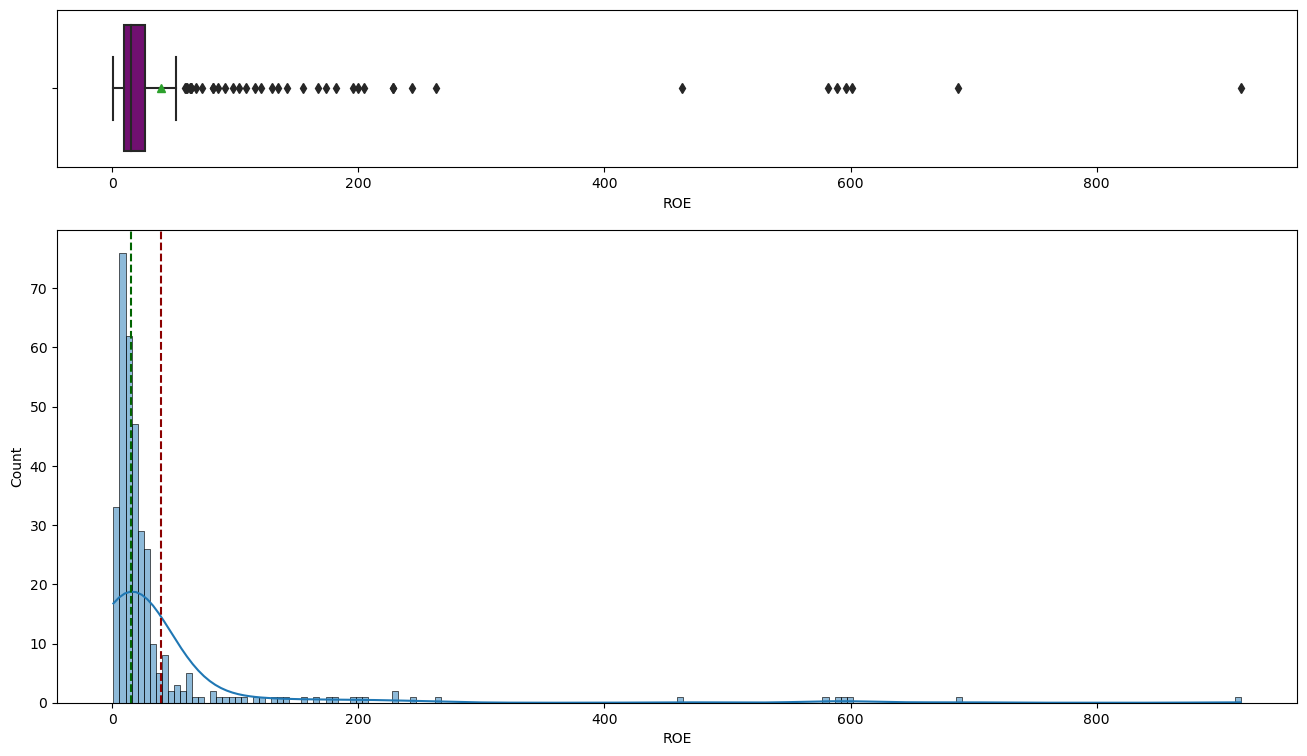

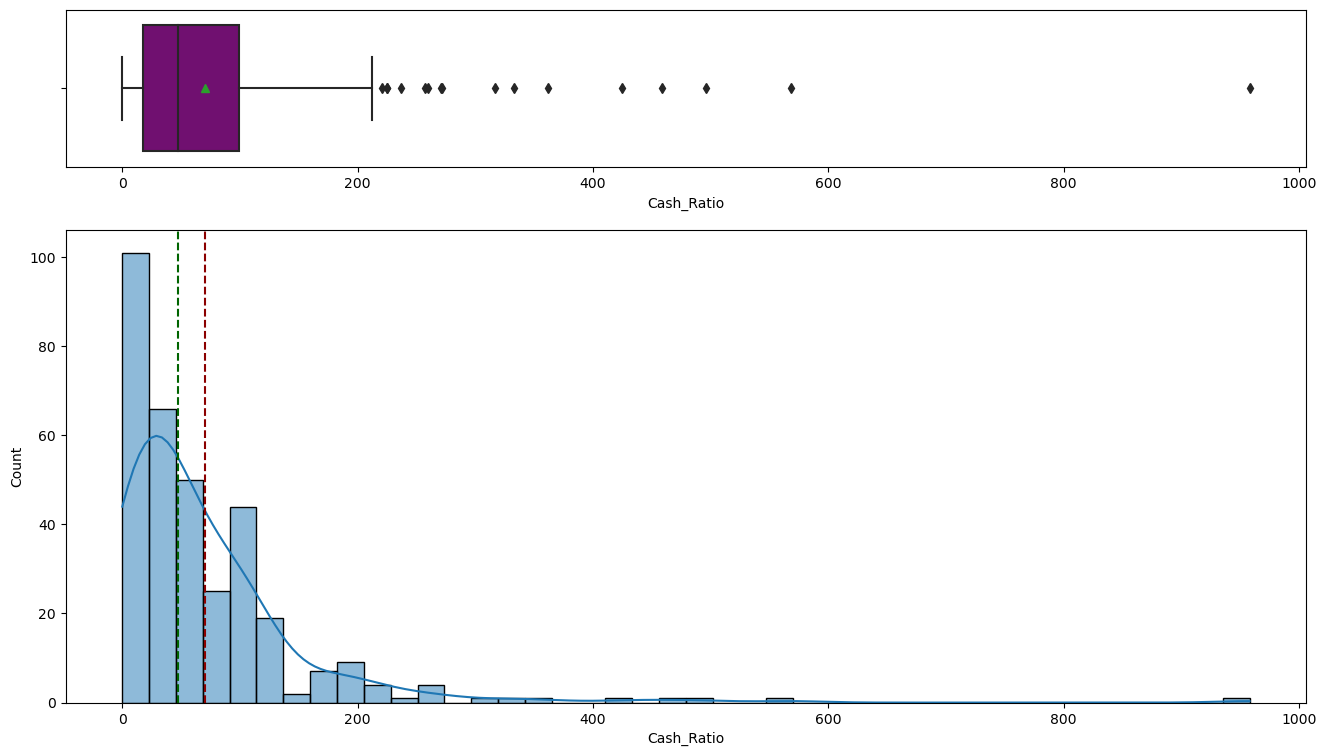

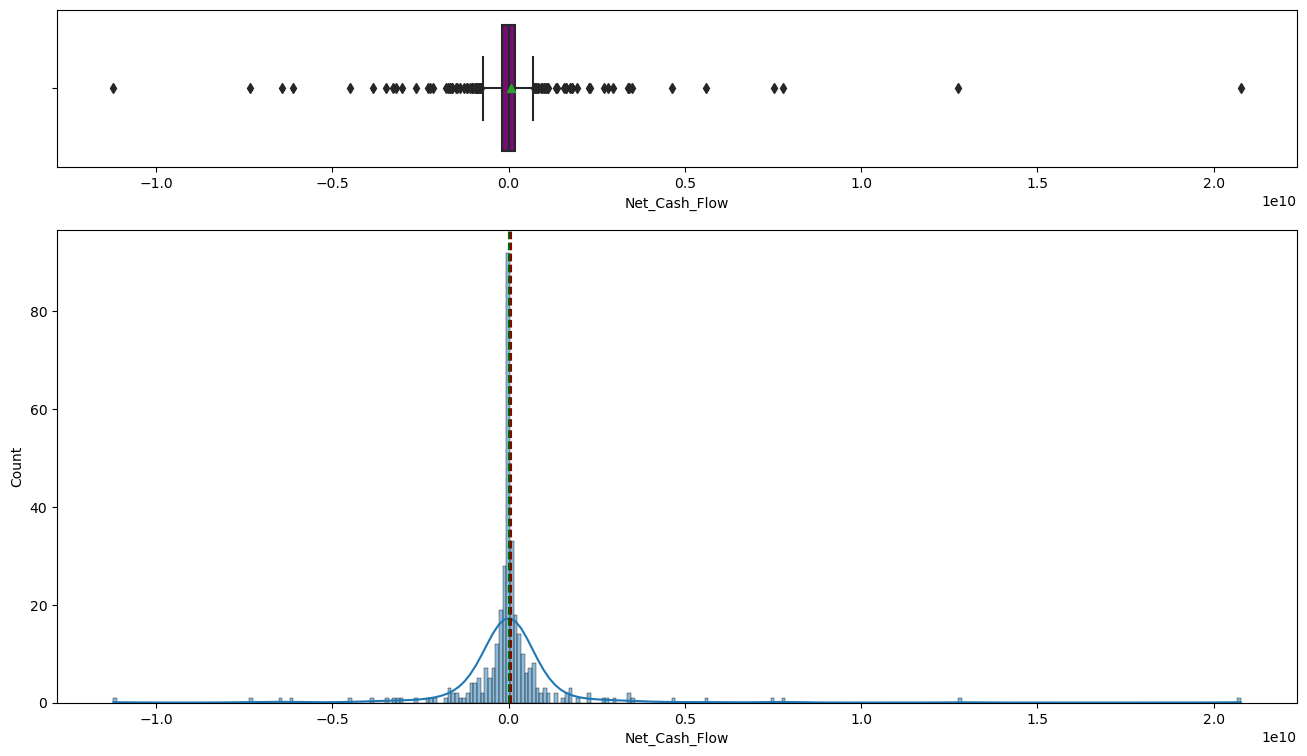

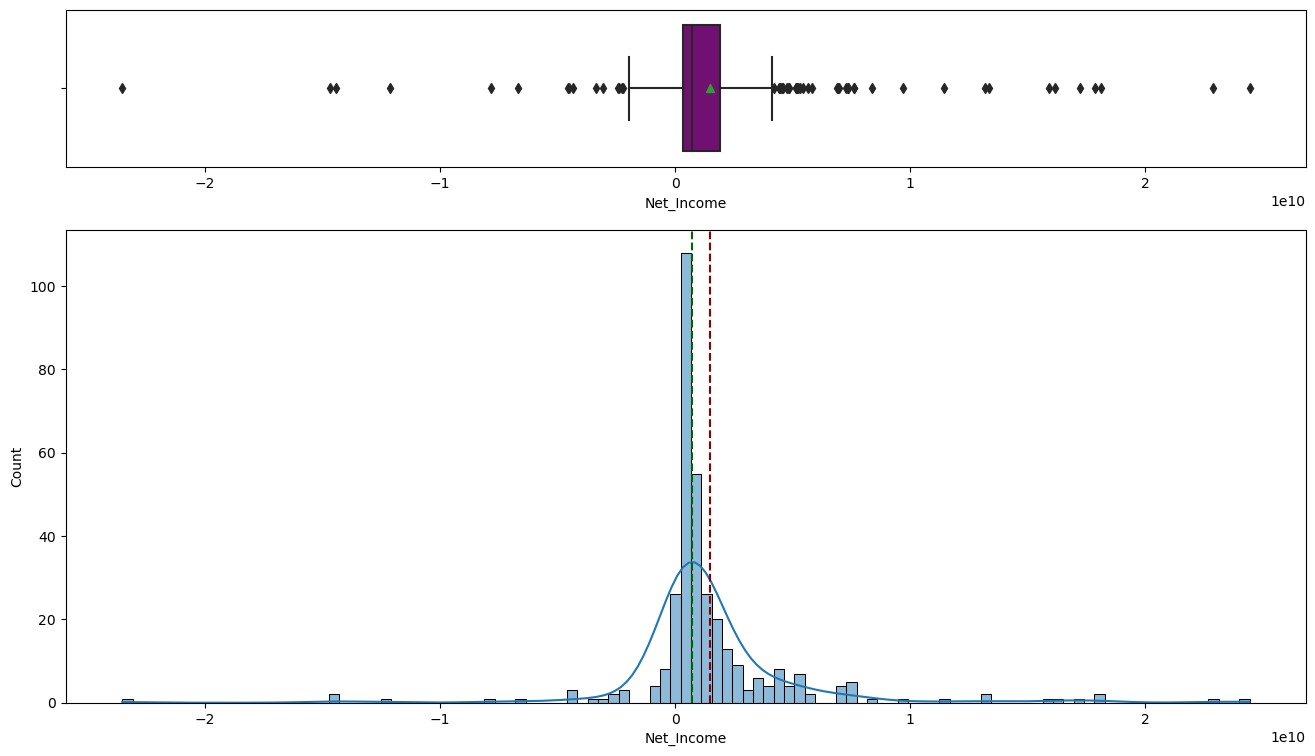

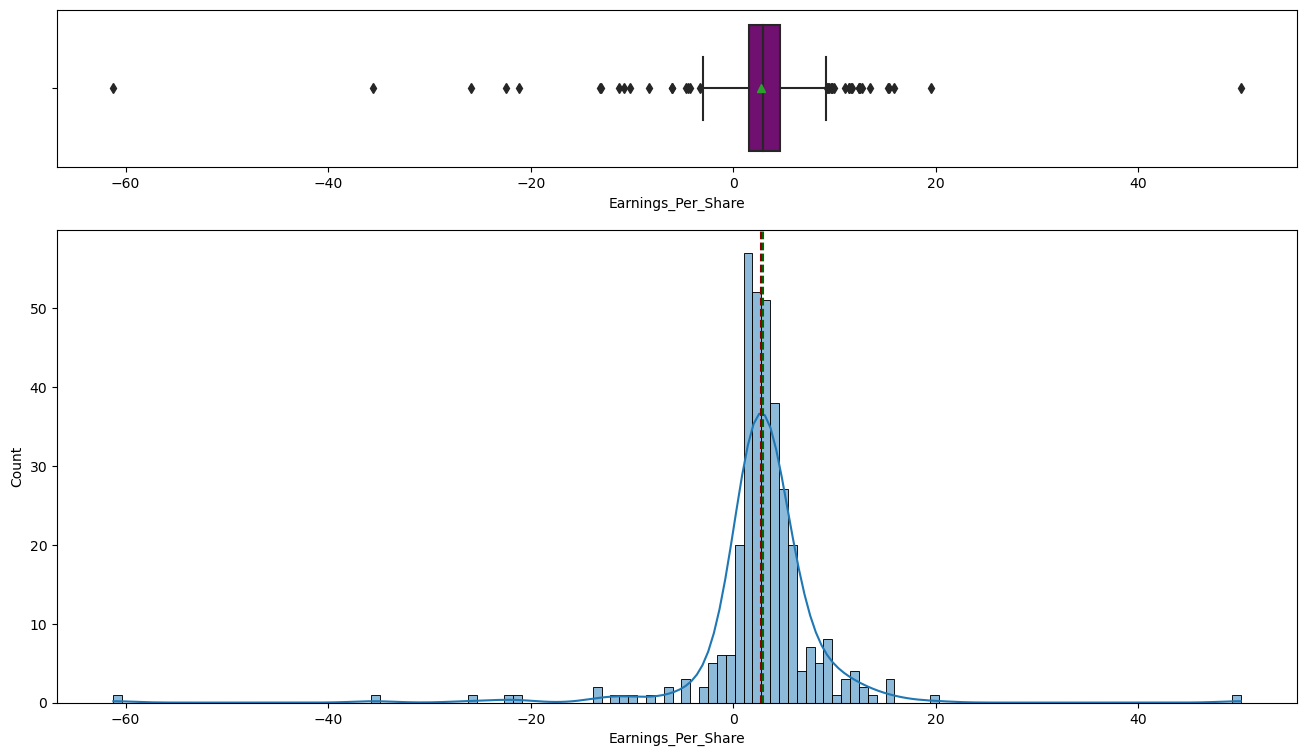

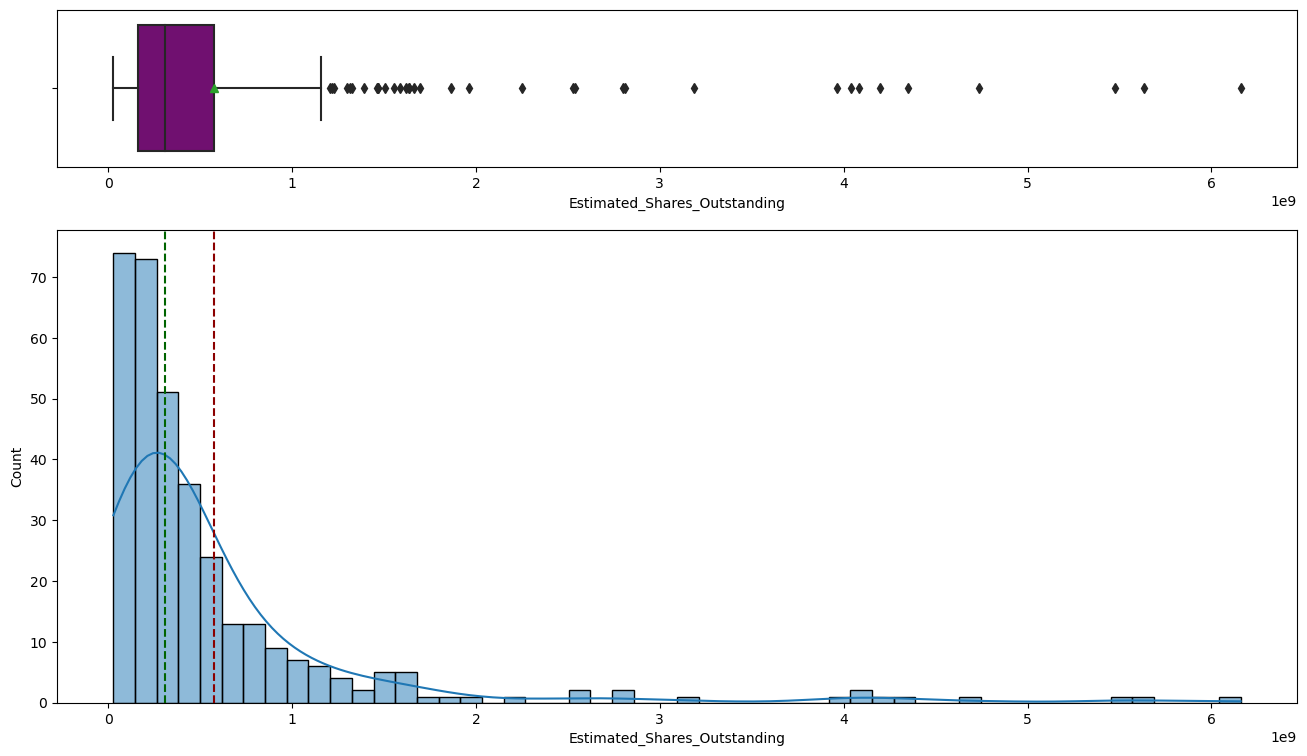

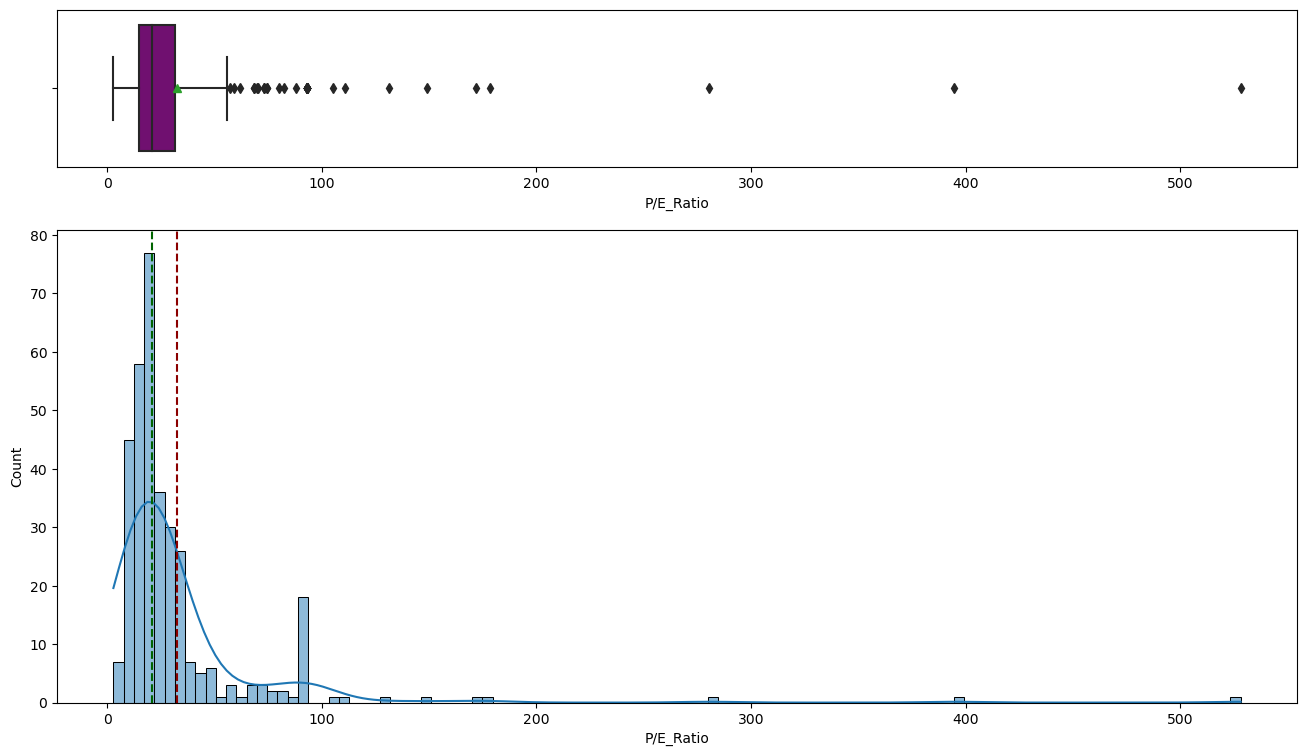

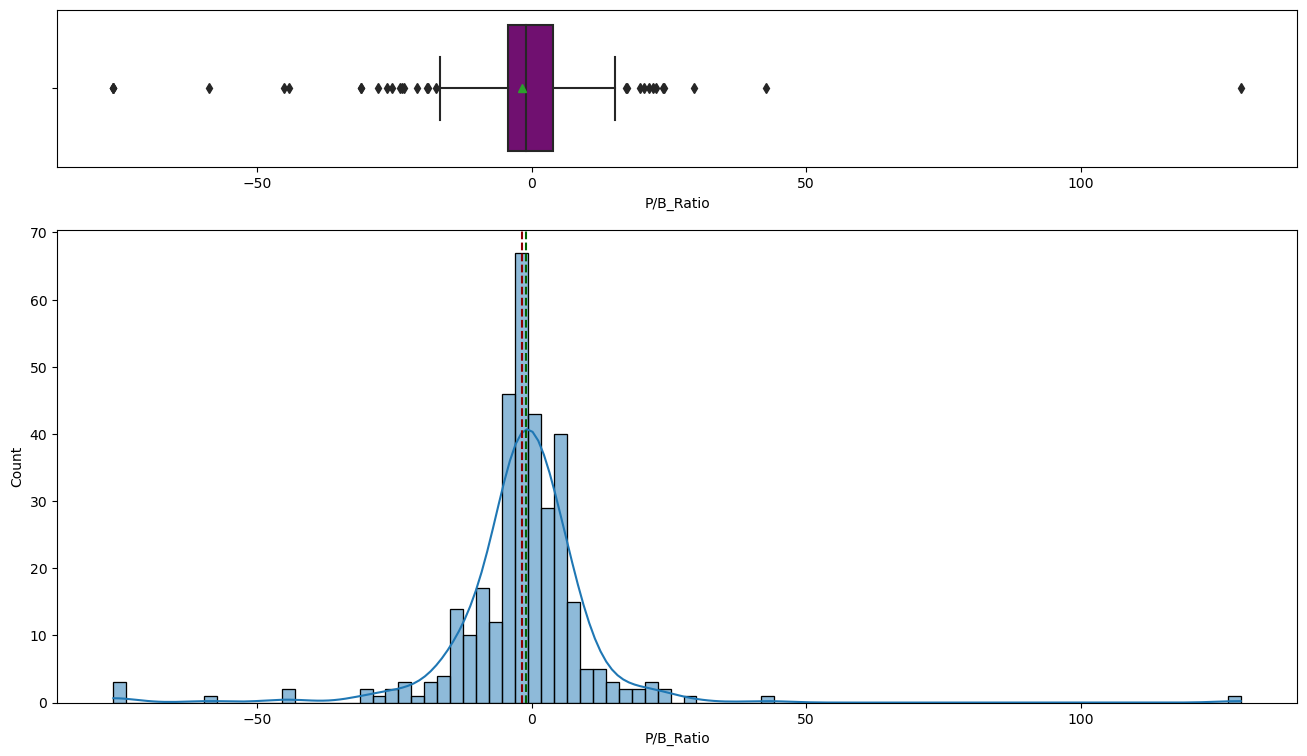

In [12]:
for col in numeric_cols:
    univ_plot(df,df[col])

In [13]:
def univ_pct_plot(data,hue=None):
    plt.figure(figsize=(26,4))

    # Countplot
    ax = sns.countplot(
        x = data,
        hue=hue,
        order = data.value_counts().index
    )
    total = len(data)
    # Annotation
    #for p in ax.patches:
    #    an_txt = "{:.1f}%".format(100 * p.get_width()/total)
    #    y = p.get_width() /2 + p.get_x()
    #    x = p.get_height()
    #    ax.annotate(an_txt,(x,y))

    plt.show()

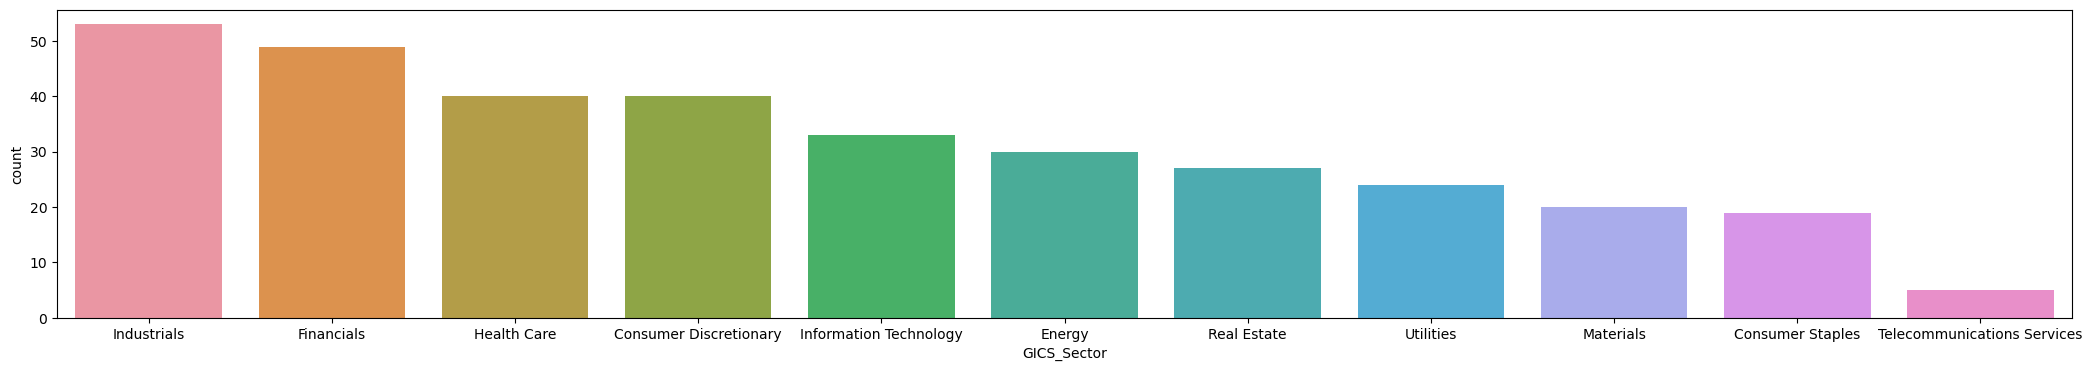

In [14]:
univ_pct_plot(df['GICS_Sector'])

In [15]:
# Sector distribution of Industries
pd.crosstab(df['GICS_Sub_Industry'], df['GICS_Sector']).style.highlight_max(
    color="lightgreen", axis=0
)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
GICS_Sub_Industry,,,,,,,,,,,
Advertising,2,0,0,0,0,0,0,0,0,0,0
Aerospace & Defense,0,0,0,0,0,4,0,0,0,0,0
Agricultural Products,0,1,0,0,0,0,0,0,0,0,0
Air Freight & Logistics,0,0,0,0,0,3,0,0,0,0,0
Airlines,0,0,0,0,0,5,0,0,0,0,0
Alternative Carriers,0,0,0,0,0,0,0,0,0,1,0
"Apparel, Accessories & Luxury Goods",1,0,0,0,0,0,0,0,0,0,0
Application Software,0,0,0,0,0,0,2,0,0,0,0
Asset Management & Custody Banks,0,0,0,4,0,0,0,0,0,0,0


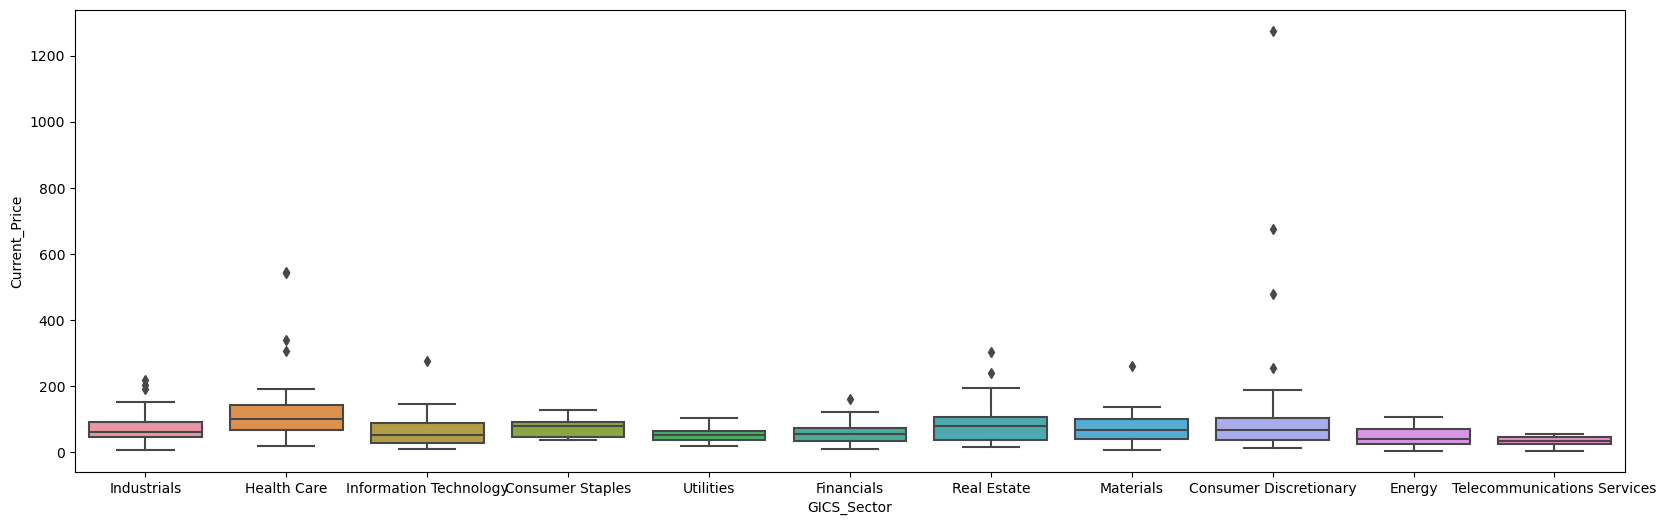

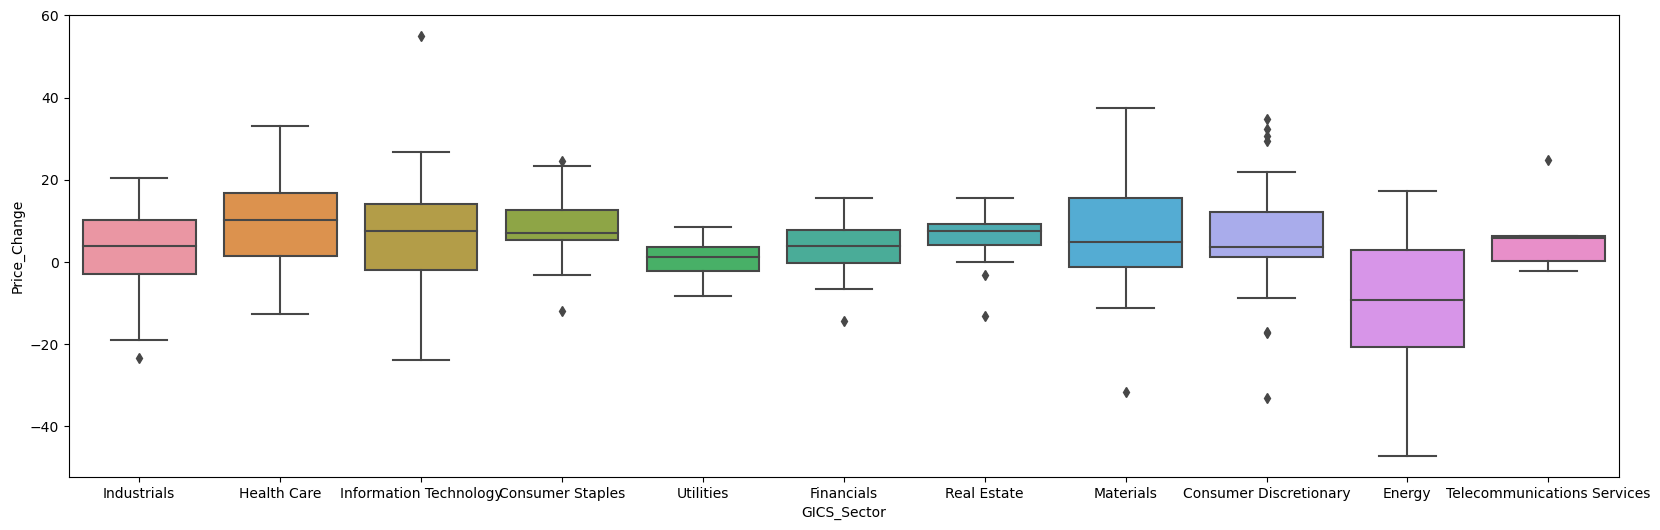

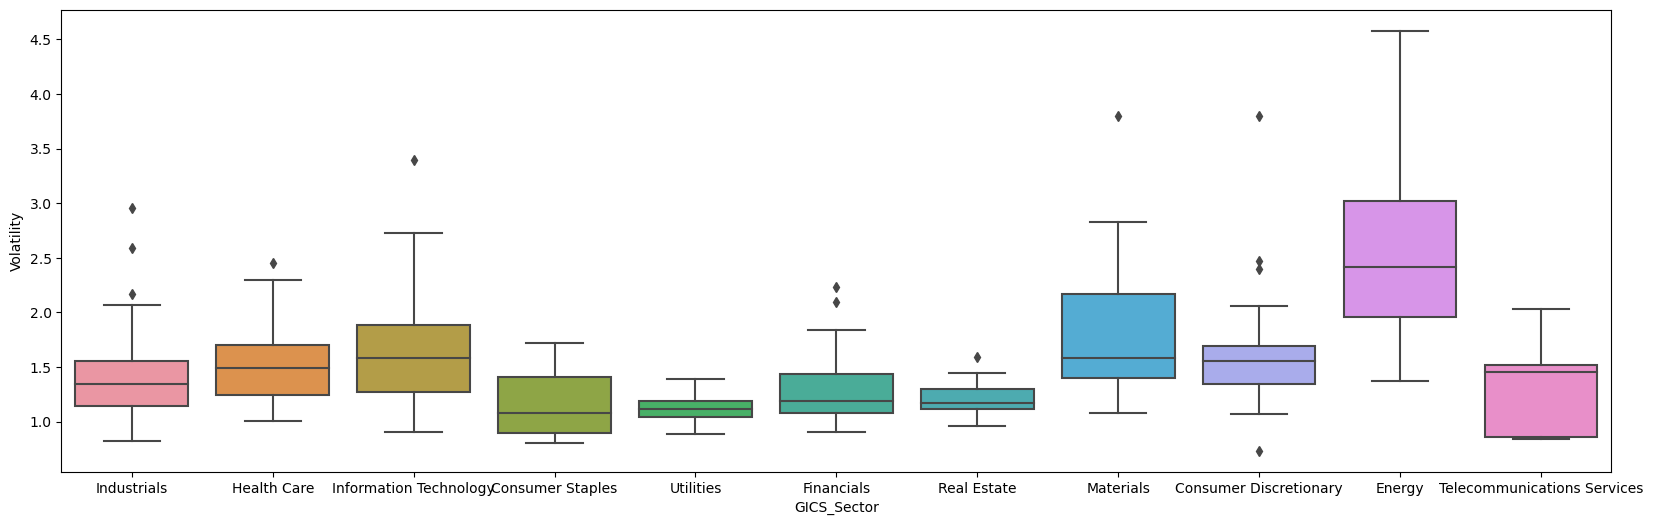

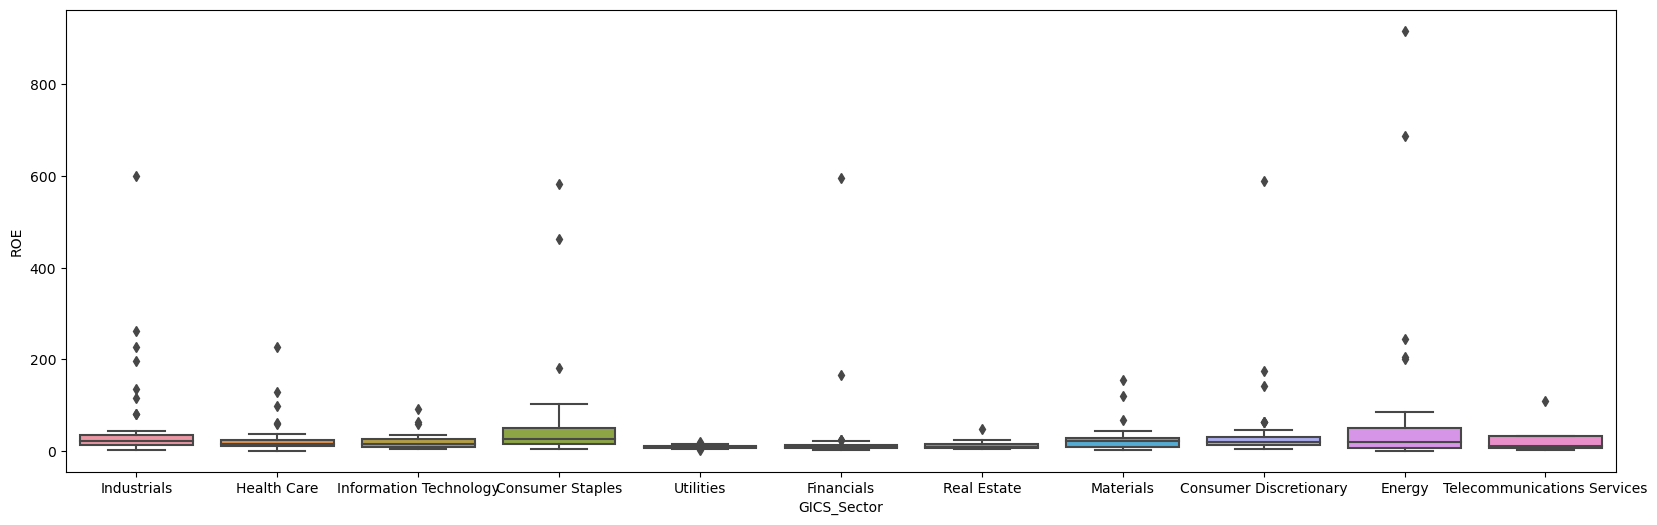

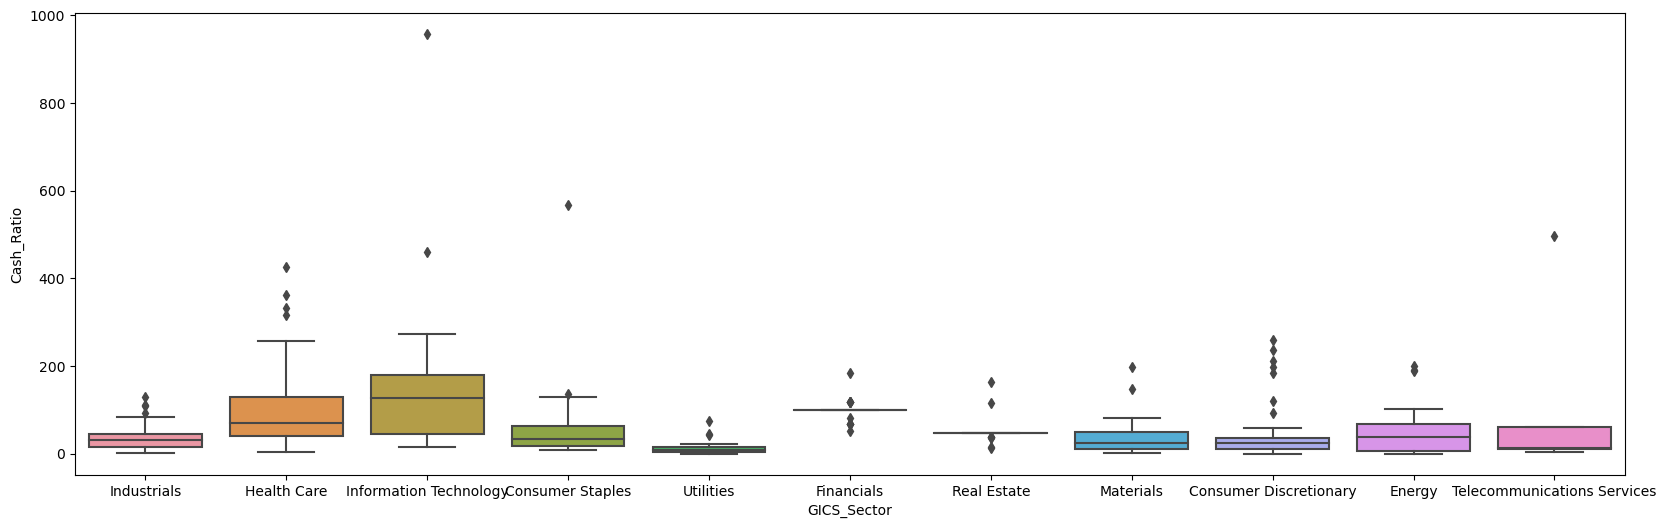

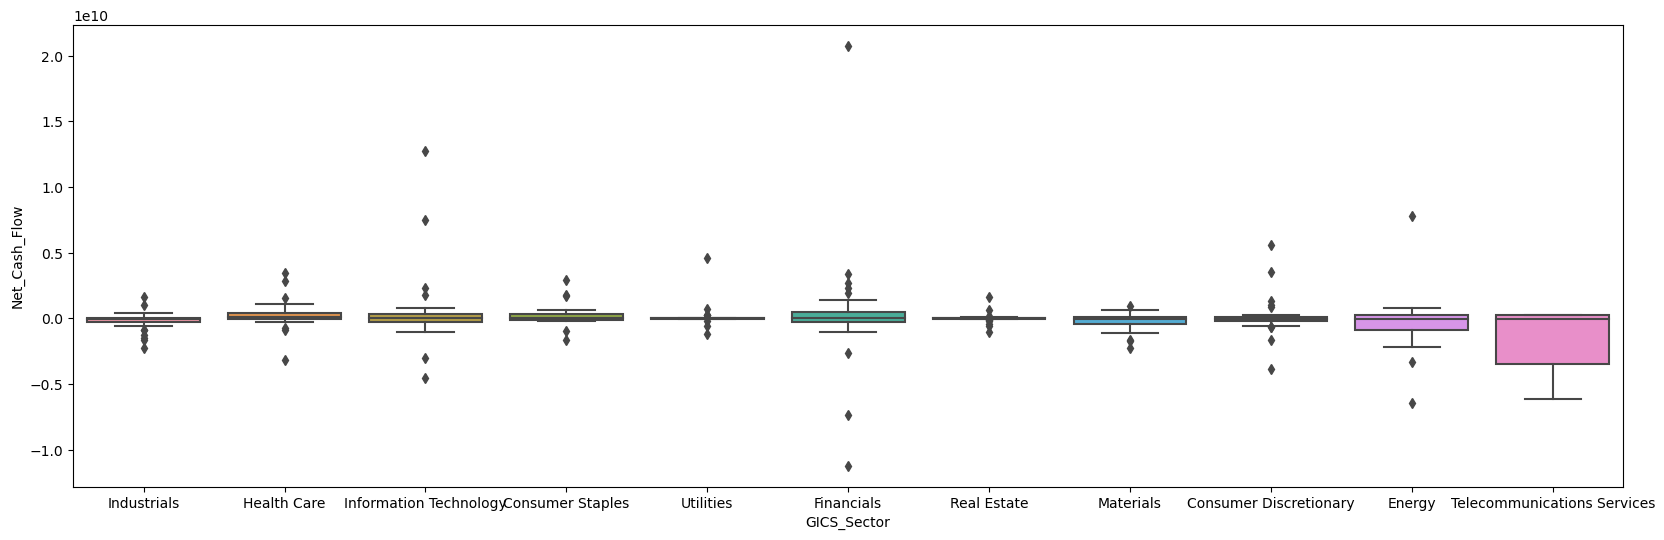

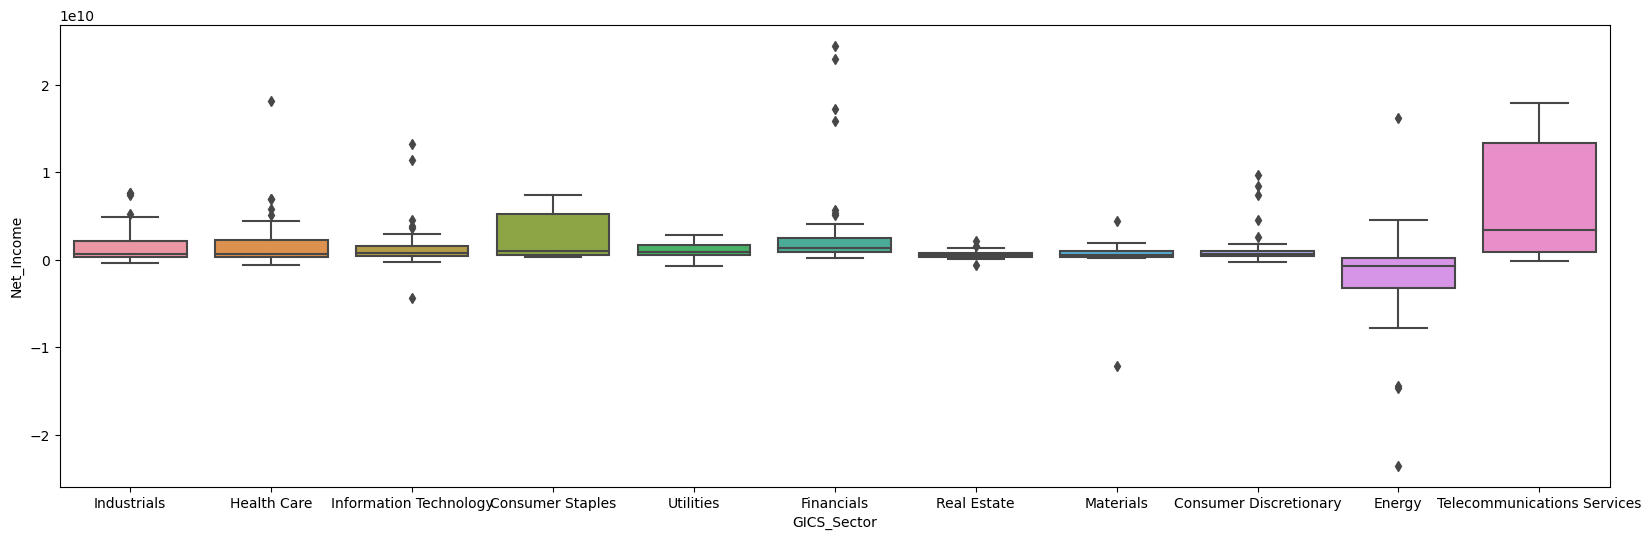

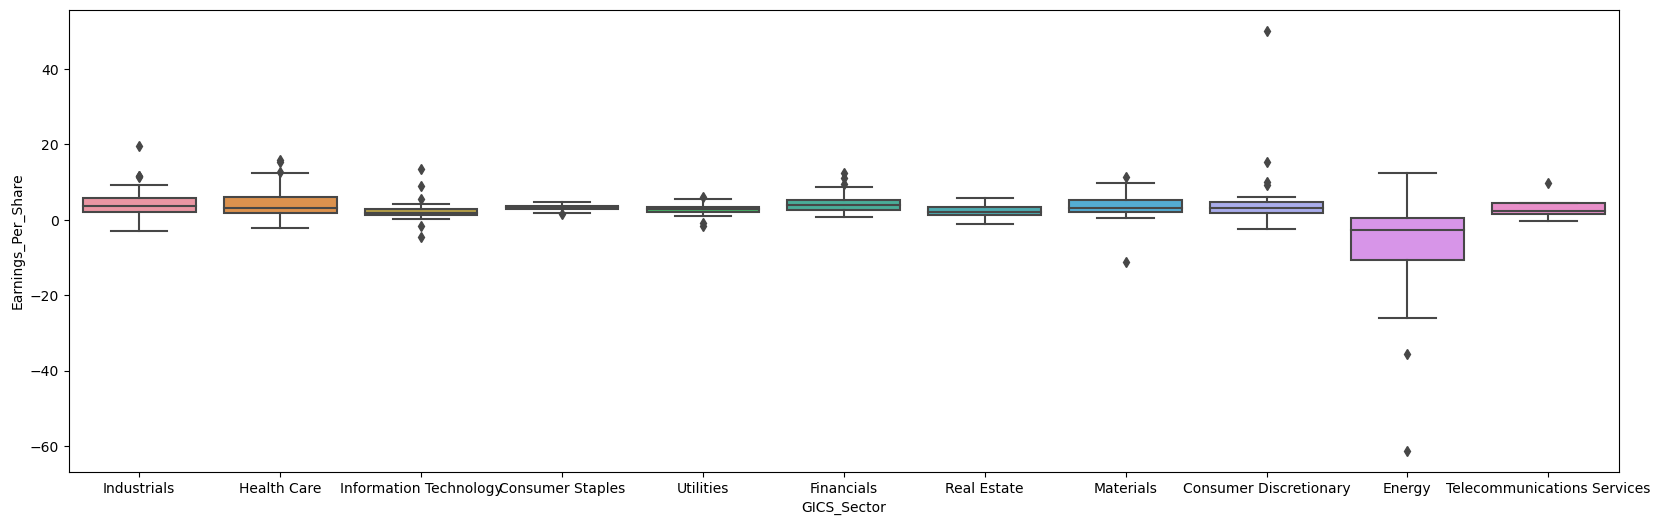

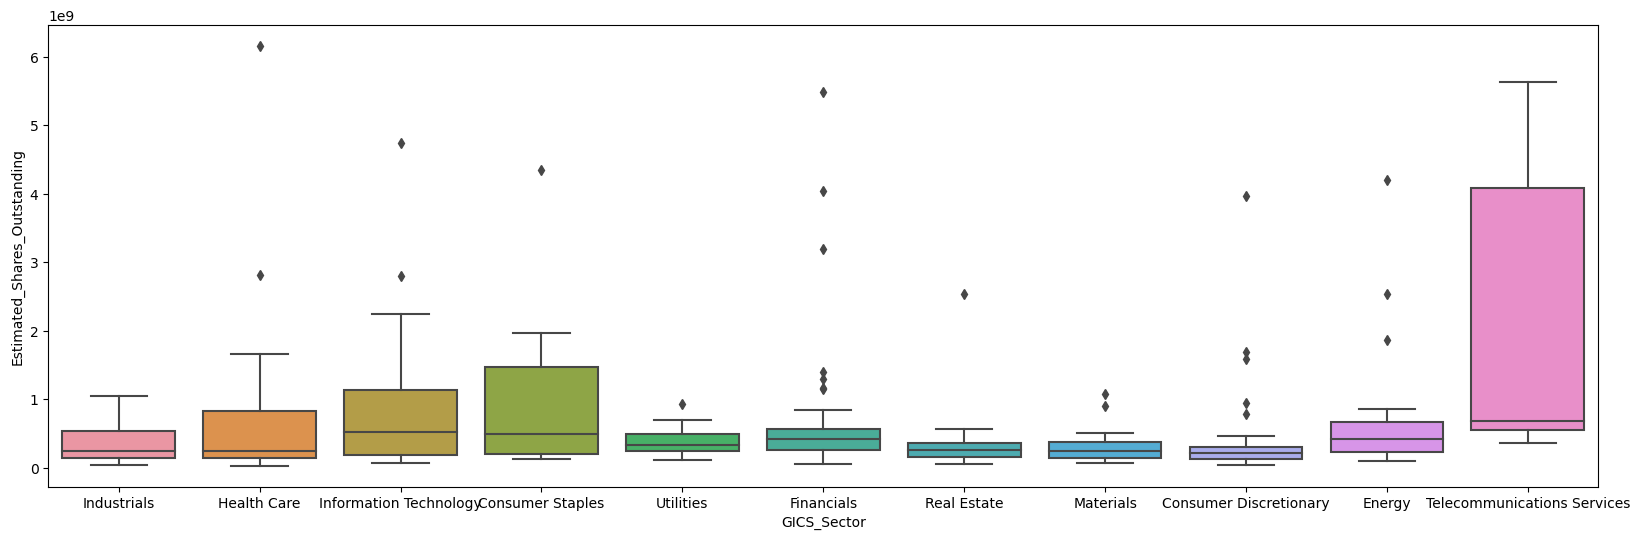

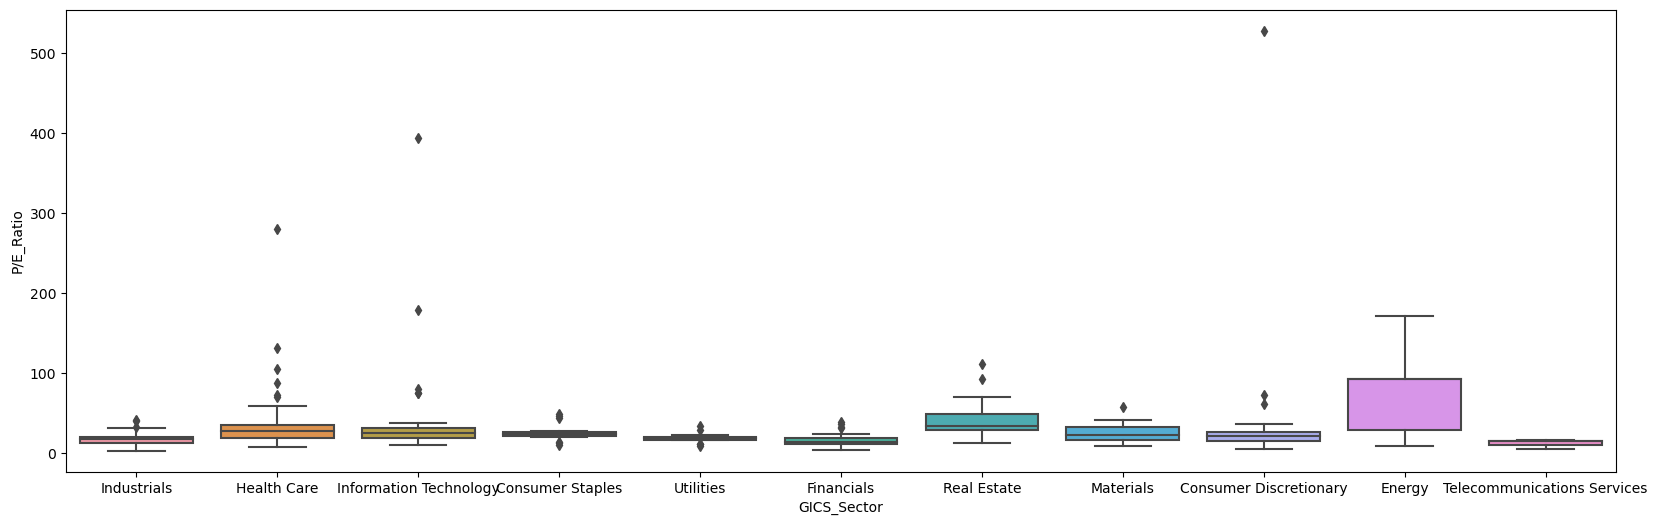

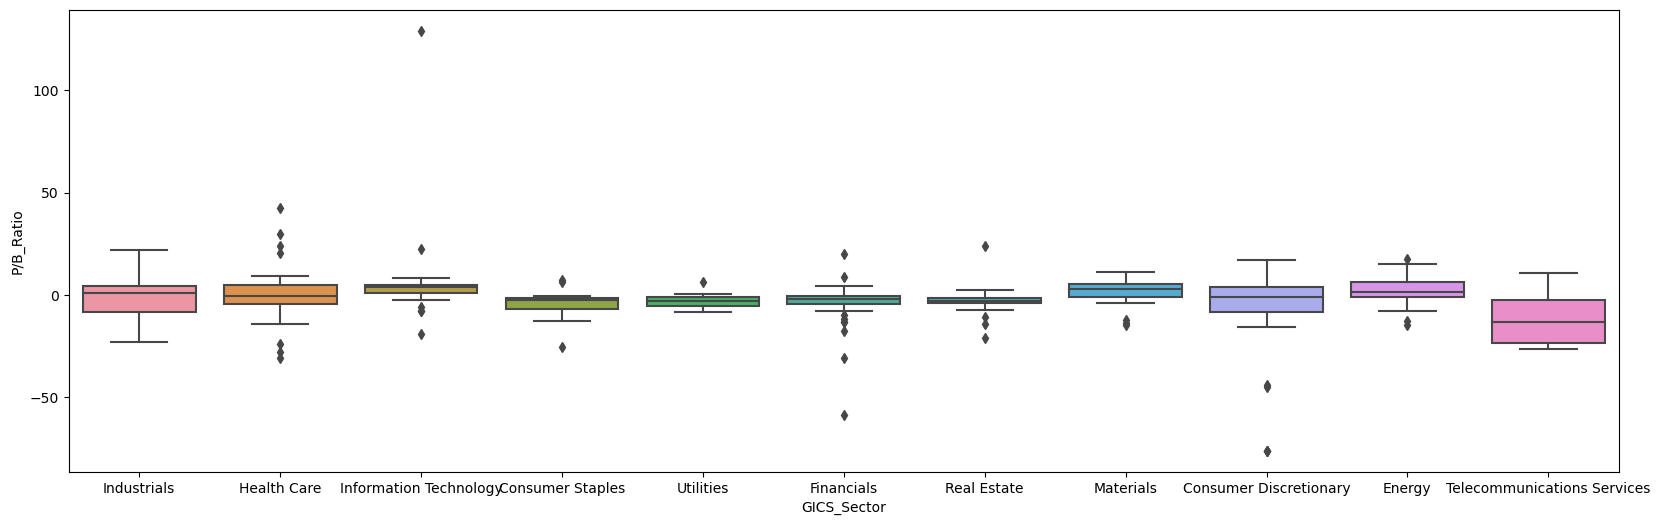

In [16]:
#Industry distribution of Data

for col in numeric_cols:
    plt.figure(figsize=(20,6))
    sns.boxplot(data=df,y= col,x='GICS_Sector')
    plt.show()

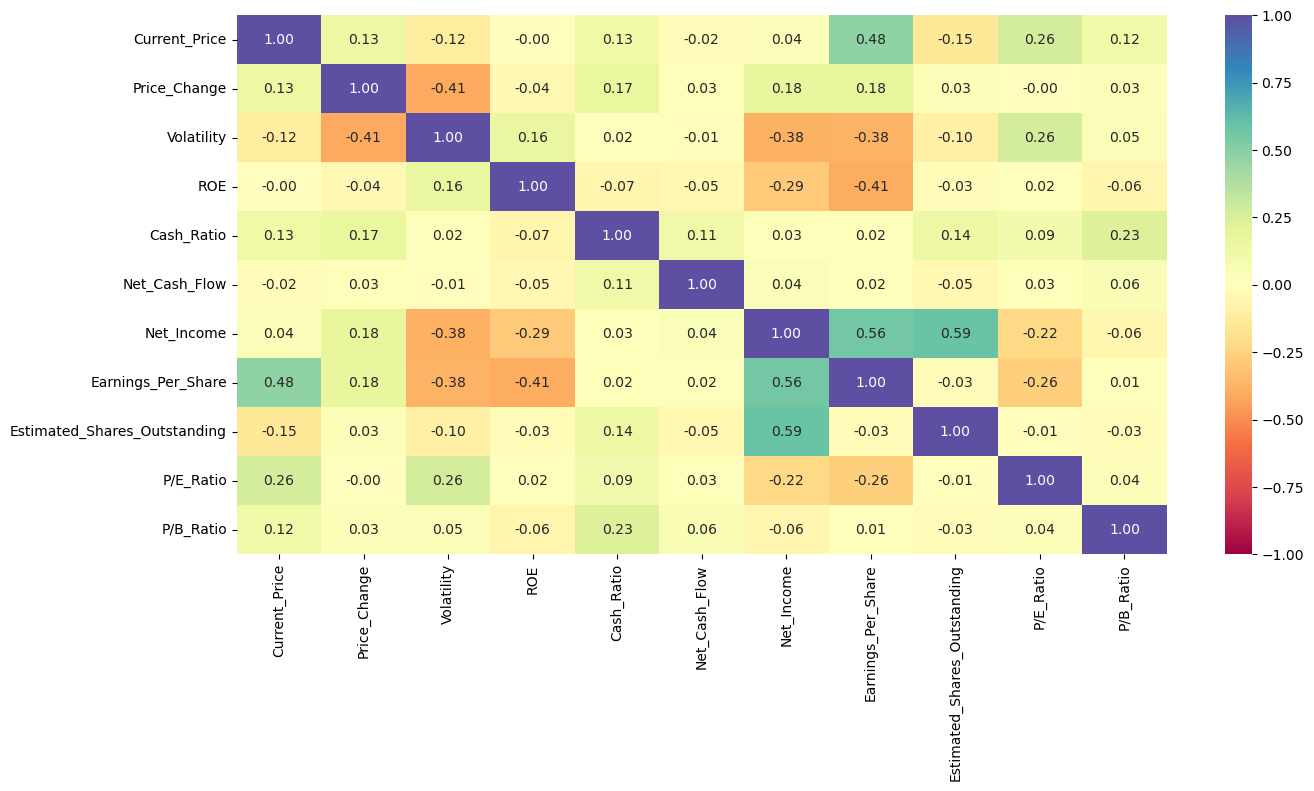

In [17]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

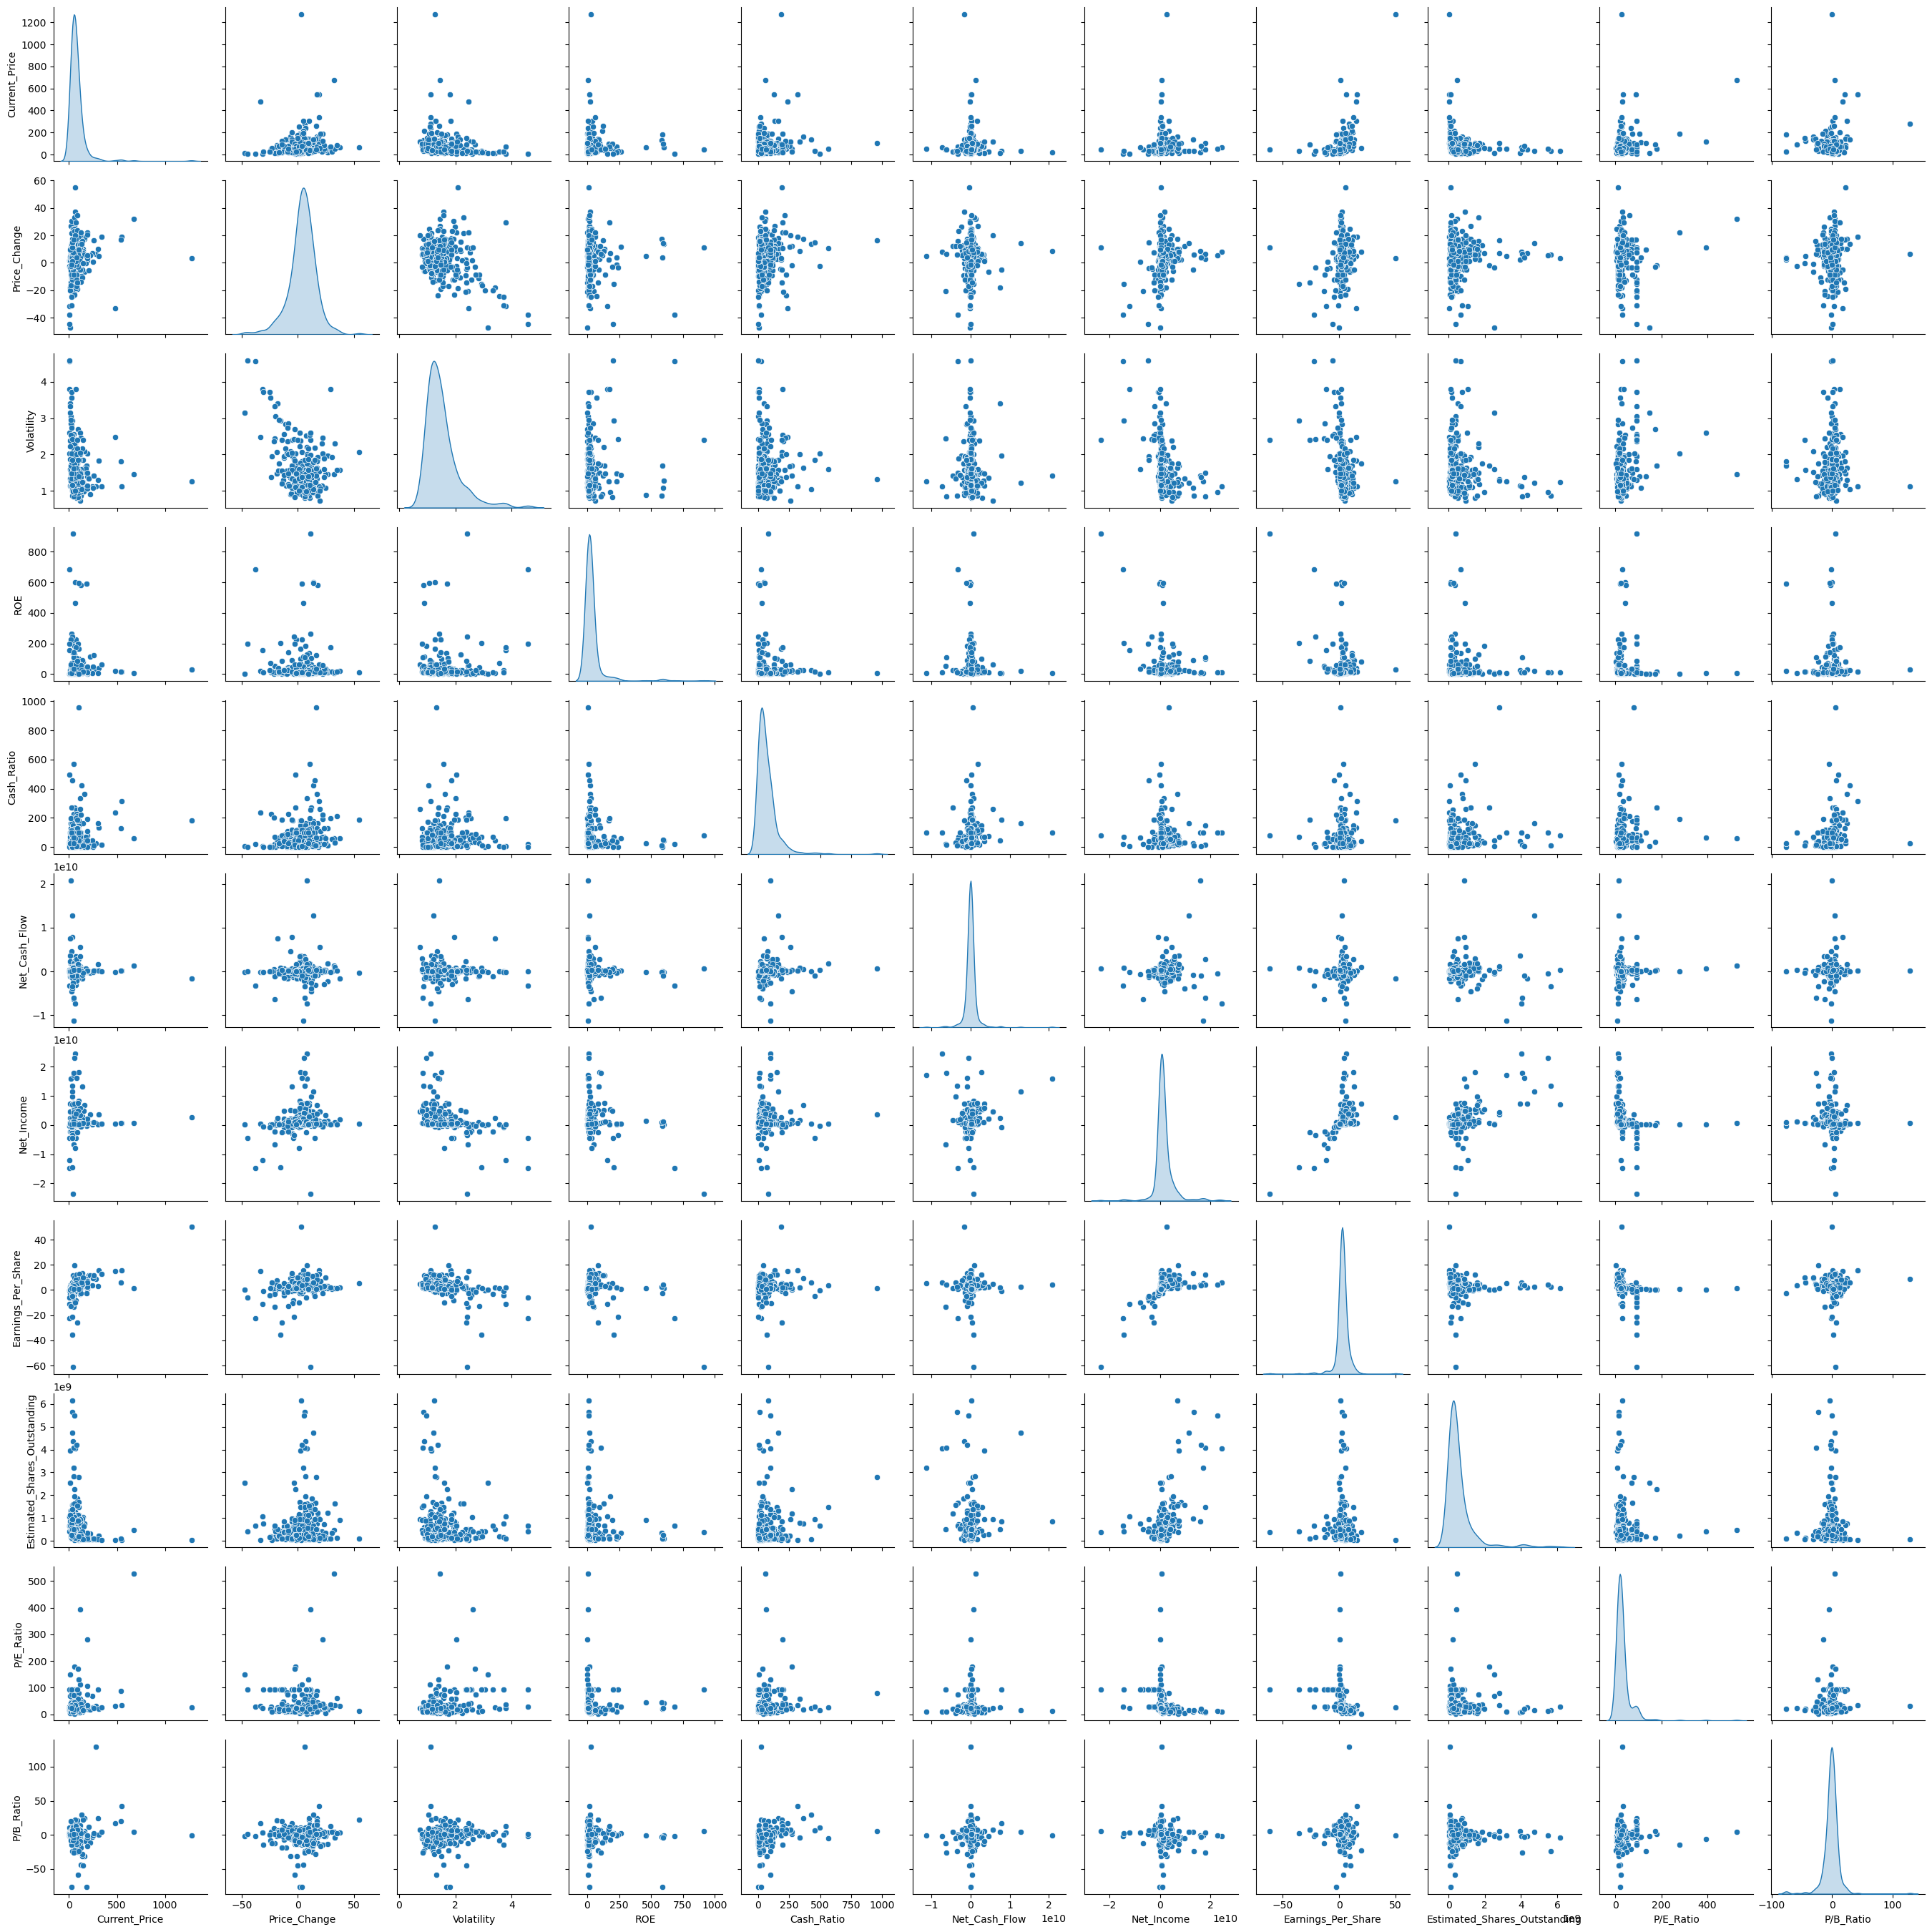

In [18]:
sns.pairplot(df[numeric_cols],diag_kind="kde");


# **3. Clustering**

## **3.1. K-means**

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer

In [20]:
X = df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1)

**Find the "K"**

- **The Elbow Method**

In [21]:


#visualizer.fit(X) 
#visualizer.show()
#plt.show()

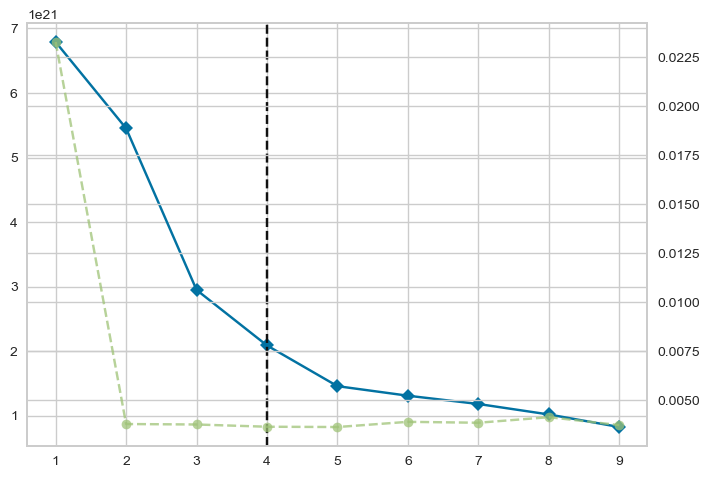

In [22]:
visualizer = KElbowVisualizer(
    KMeans(random_state=21,n_init='auto'),
    k=(1,10)
)

sscaler = StandardScaler()
pipe = make_pipeline(visualizer)
pipe.fit(X)
plt.show()

- The elbow method suggests <font color='blue'>k=5</font>.


- **The Silouette Score**

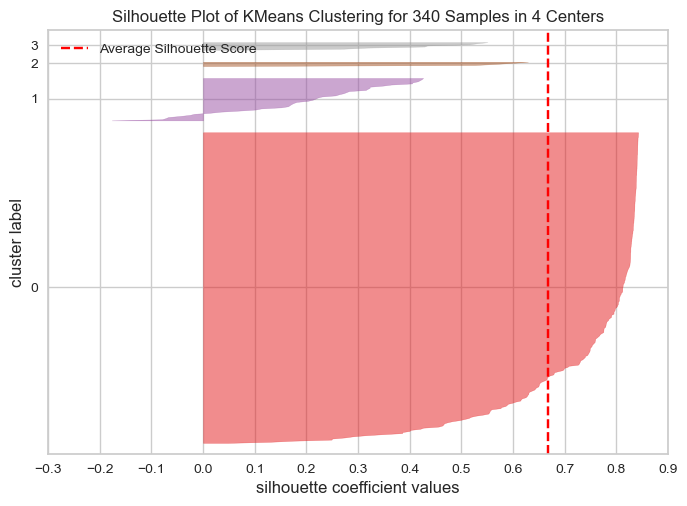

<Figure size 400x300 with 0 Axes>

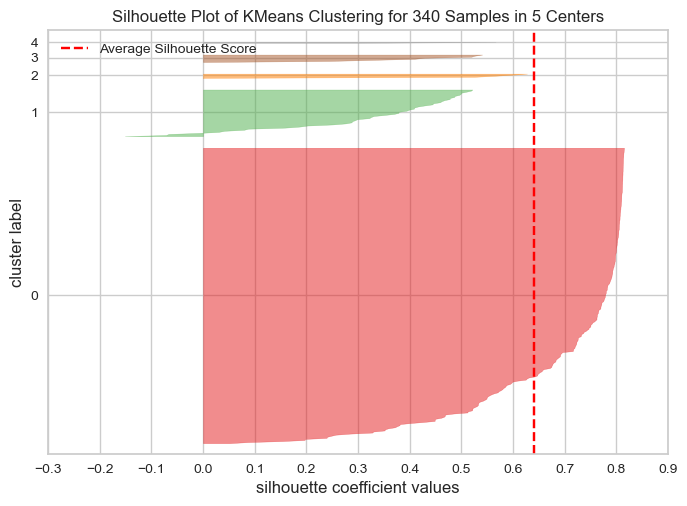

<Figure size 400x300 with 0 Axes>

In [23]:
for k in range(4,6):
    
    model = KMeans(k,random_state=21,n_init='auto')
    silhouette_visualizer(
        model,
        X,
        is_fitted="auto"
    )
    plt.figure(figsize=(4,3))
    plt.show()


- Sihouette also suggests k = 5, so we have our K that is <font color='red'> **5** </font>

**Clustering with K = 5**

In [24]:
kmeans = KMeans(n_clusters=4, random_state=21,n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=21)

In [25]:
df['K_Cluster'] = kmeans.labels_
pd.crosstab(df.GICS_Sector, df.K_Cluster).style.highlight_max(color = 'lightgreen', axis = 0)

K_Cluster,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,36,4,0,0
Consumer Staples,13,6,0,0
Energy,23,2,4,1
Financials,40,6,0,3
Health Care,33,6,0,1
Industrials,44,9,0,0
Information Technology,27,5,0,1
Materials,18,1,1,0
Real Estate,27,0,0,0


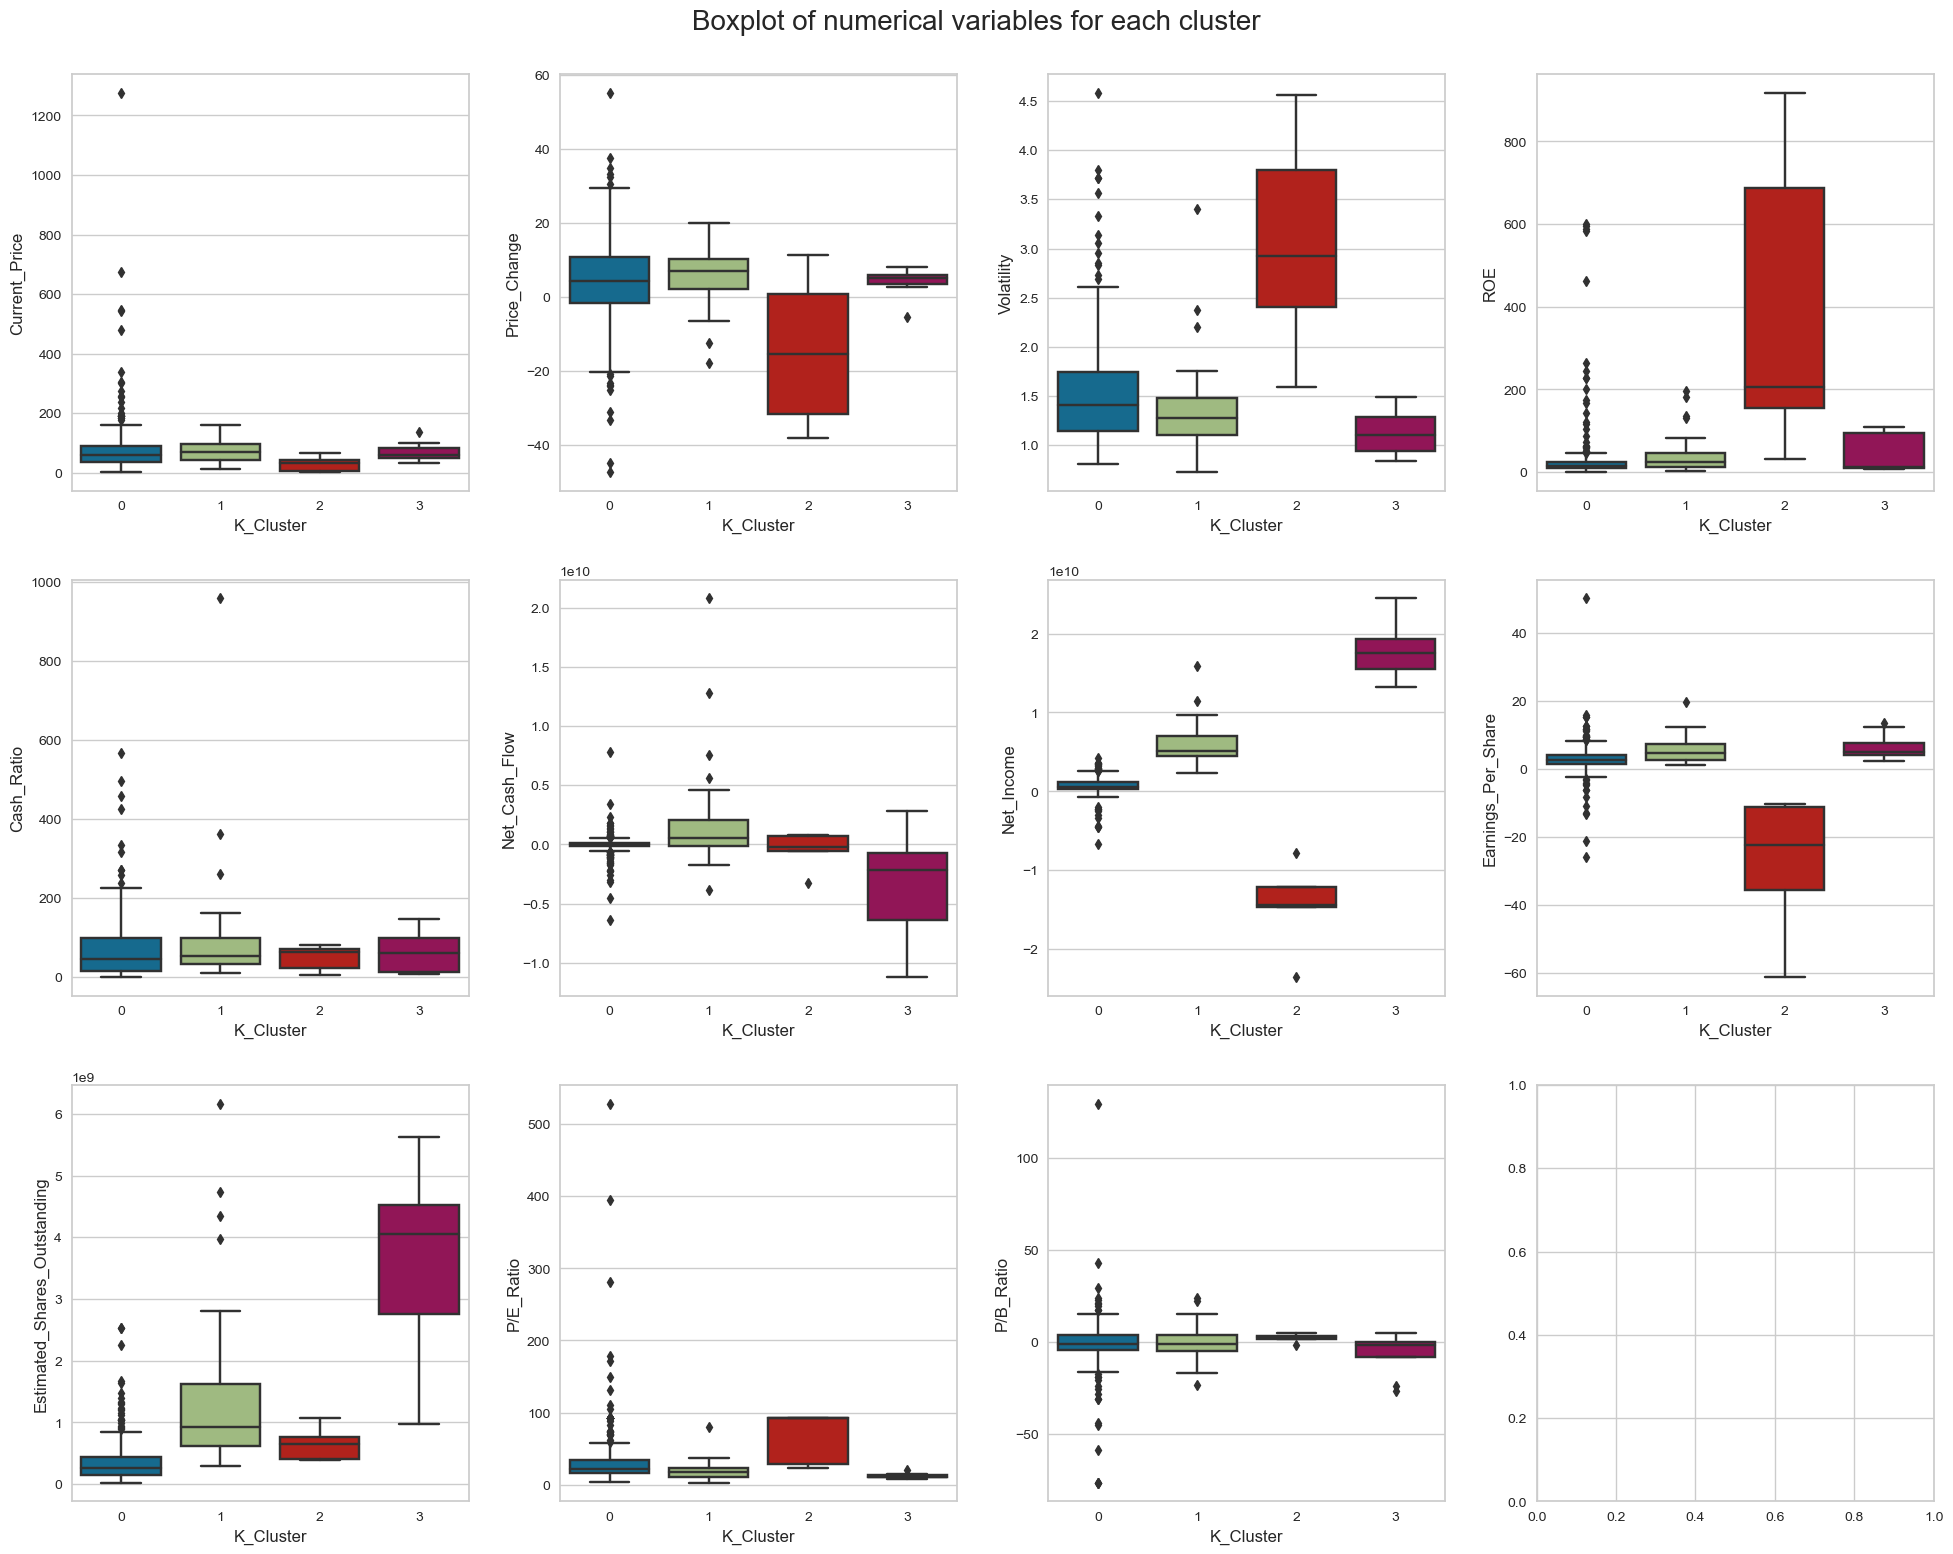

In [26]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=df[numeric_cols[counter]],x=df['K_Cluster'])
        counter = counter+1

fig.tight_layout(pad=2.0)

In [27]:
for i in range(0,4):
    print(\
        'Category:',i,'\n',
        df.loc[df['K_Cluster']==i]['Security'].tolist,'\n'
    )

Category: 0 
 <bound method IndexOpsMixin.tolist of 3              Adobe Systems Inc
4           Analog Devices, Inc.
5      Archer-Daniels-Midland Co
6          Alliance Data Systems
7                    Ameren Corp
                 ...            
335                   Yahoo Inc.
336              Yum! Brands Inc
337       Zimmer Biomet Holdings
338                Zions Bancorp
339                       Zoetis
Name: Security, Length: 287, dtype: object> 

Category: 1 
 <bound method IndexOpsMixin.tolist of 0          American Airlines Group
1                           AbbVie
2              Abbott Laboratories
23                       Amgen Inc
38             American Express Co
39                  Boeing Company
40            Bank of America Corp
75           Capital One Financial
82                      CVS Health
83                   Chevron Corp.
86                 Delta Air Lines
92         The Walt Disney Company
119                   Exelon Corp.
123                     Ford Mot

**And again, I don't think clustering stocks using Centroid-like machine learning makes any sense for real trading, machines can't tell and interpret the indicators as men do.**

## **3.2. Hierachical Clustering**

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist, cdist


In [29]:
X_scal = sscaler.fit_transform(X)

In [30]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(X_scal, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(X_scal))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159734
Cophenetic correlation for M

In [31]:
print('The highest C_correlation is {0} with {1} distance and {2} linkage'.format(
        high_cophenet_corr,
        high_dm_lm[0],
        high_dm_lm[1])
    )

The highest C_correlation is 0.9422540609560814 with euclidean distance and average linkage


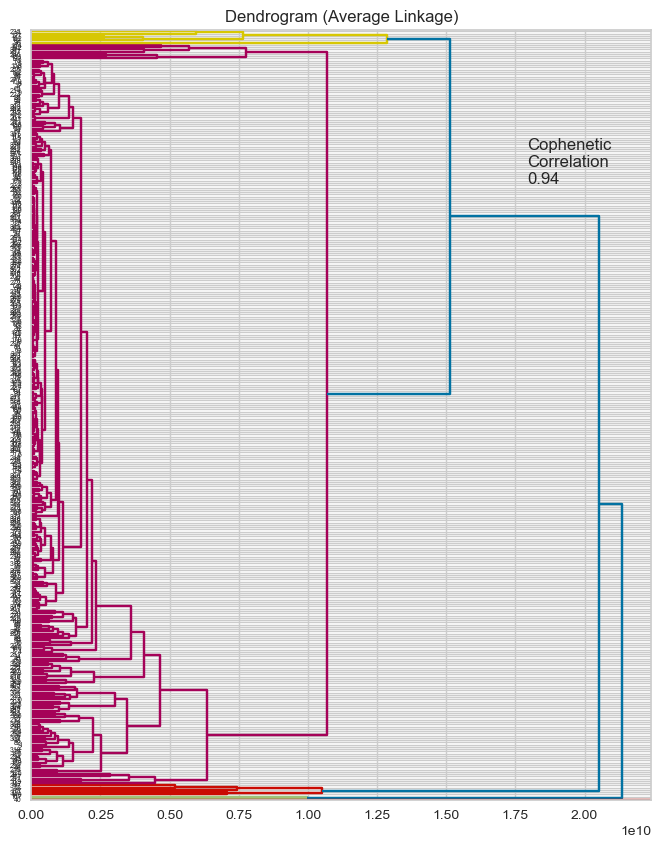

In [32]:
fig,ax = plt.subplots(figsize=(8, 10)) 
Z = linkage(X, metric="euclidean", method='average')

dendrogram(Z,orientation='right')
ax.set_title(f"Dendrogram ({'average'.capitalize()} Linkage)")
coph_corr, coph_dist = cophenet(Z, pdist(X))

plt.axhline(y=coph_corr,color='r',linestyle='-')

ax.annotate(
    f"Cophenetic\nCorrelation\n{coph_corr.round(4)}",
    (0.80, 0.80),
    xycoords="axes fraction",
)
plt.show()

- '7' is a good number of clusters for me

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
HCmodel = AgglomerativeClustering(n_clusters=7, metric="euclidean", linkage="average")
HCmodel.fit(X_scal)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=7)

In [35]:
X["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_


In [36]:
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Security"].count().values
)

/var/folders/04/vvvt38vs7wz3j6wh3b78439h0000gn/T/ipykernel_87776/3301142707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = df.groupby("HC_Clusters").mean()


In [37]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,K_Cluster,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2.00000,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.295000,2.791829e+09,13.649696,1.508484,1.00000,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,400.989188,-5.322376,0.00000,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.310000,2.800763e+09,79.893133,5.884467,1.00000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429,0.00000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.910000,6.695185e+07,31.040405,129.064585,0.00000,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-3.984676e+07,1.549443e+09,2.904682,5.622663e+08,29.091275,-2.146308,0.20303,330


In [38]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 330 Securities in cluster 6 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWar

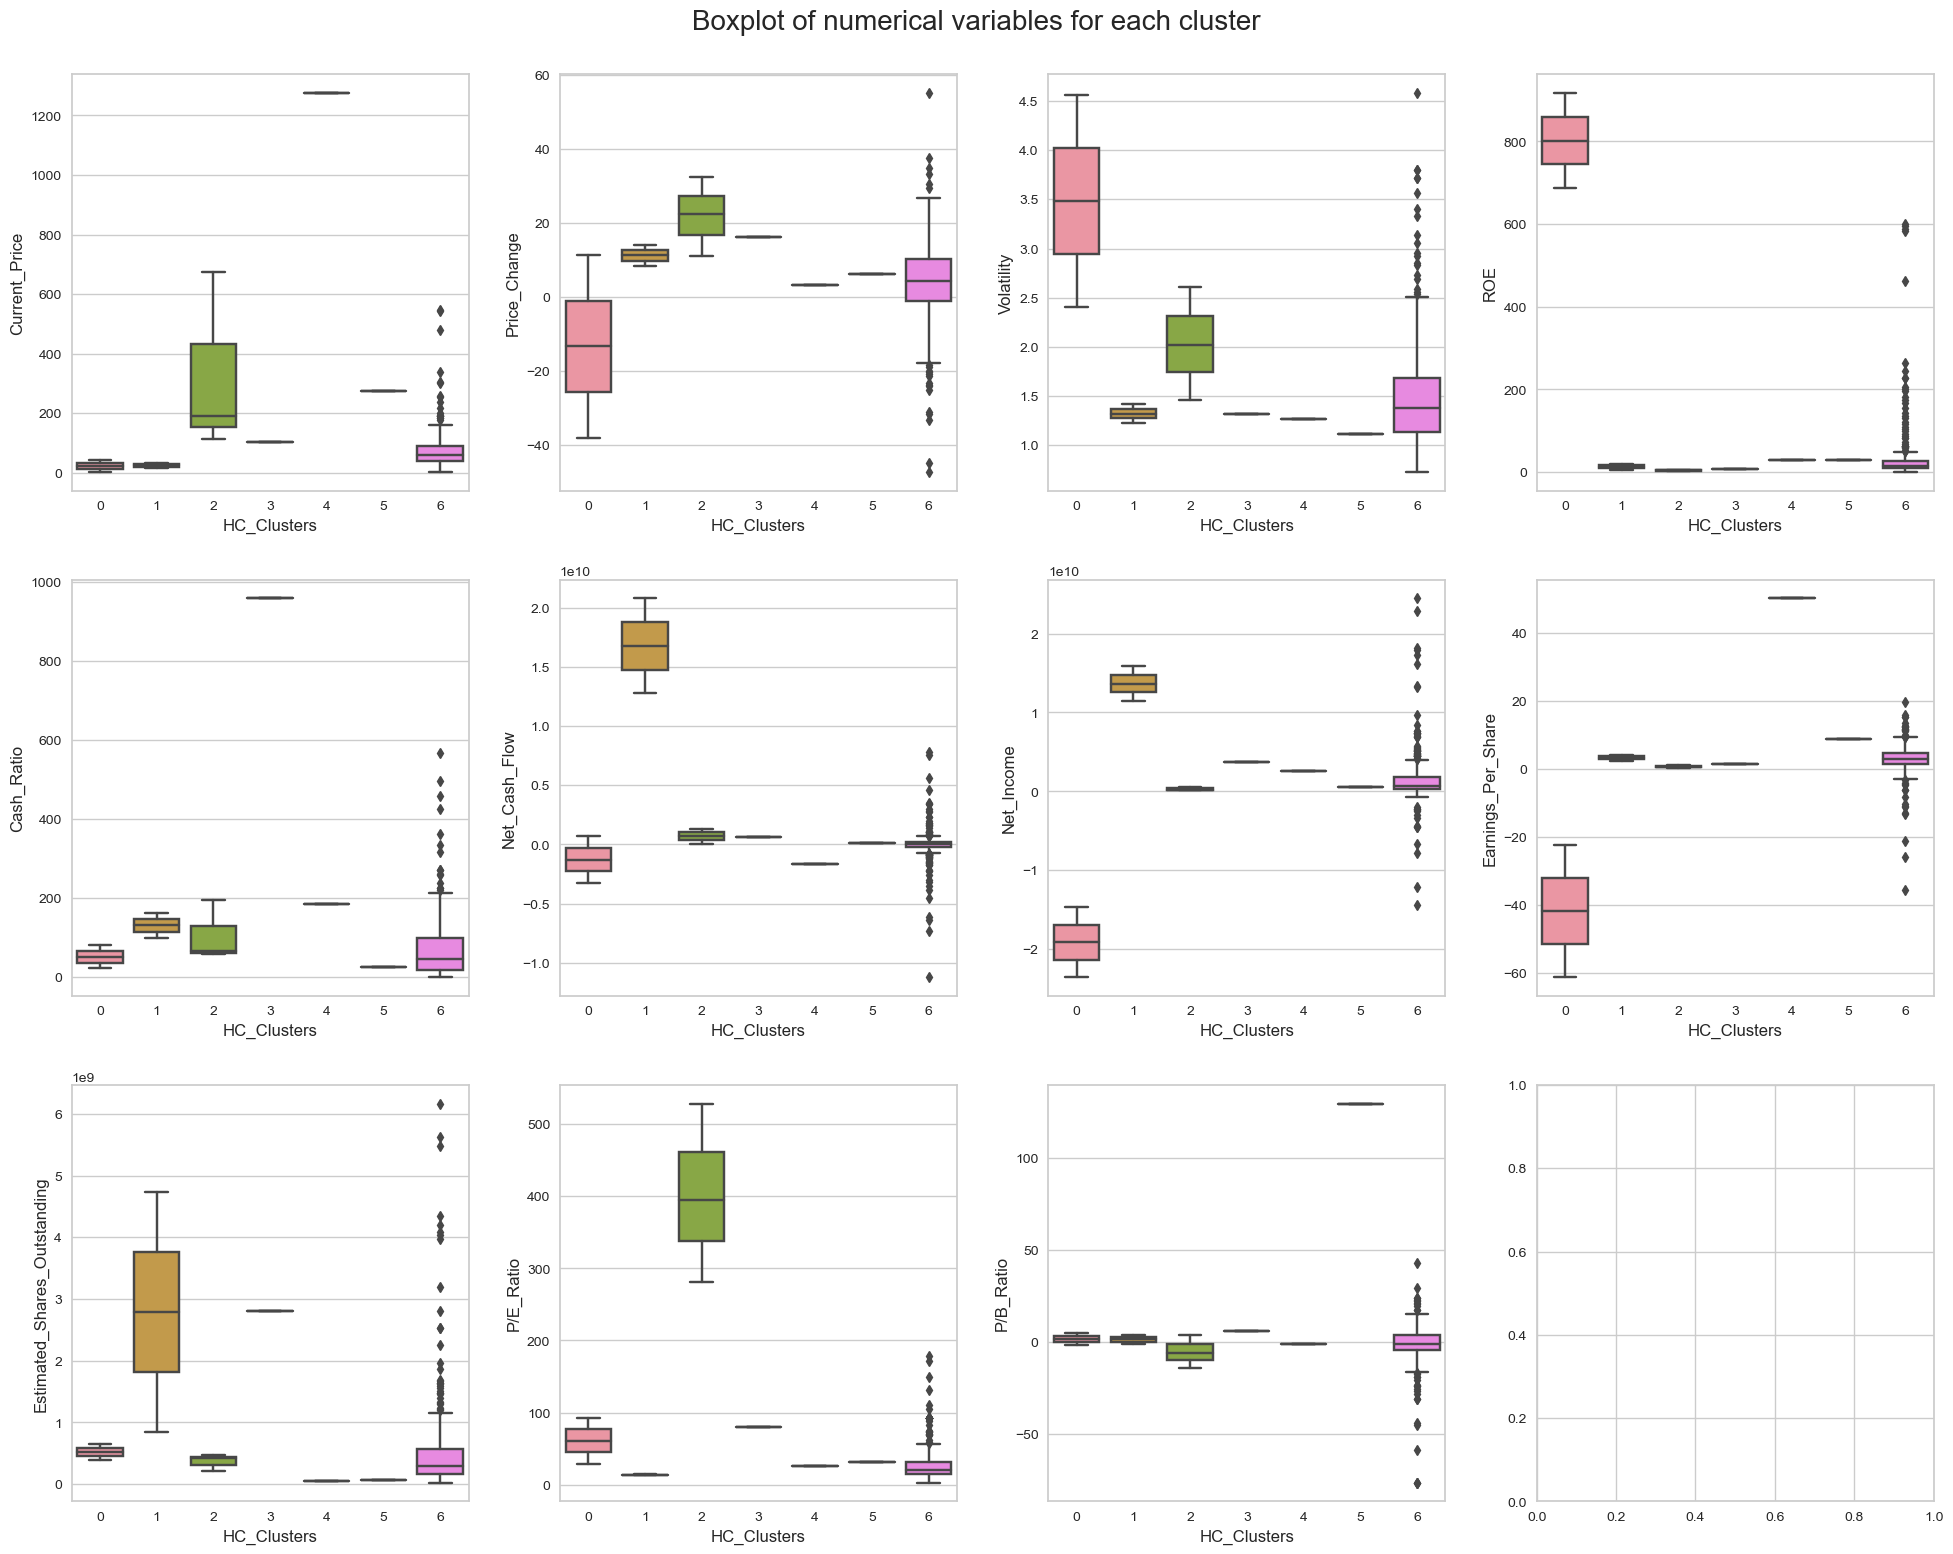

In [39]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=X[numeric_cols[counter]],x=X['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)